In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import readsav

import tol_colors
from scipy.interpolate import interp1d
from scipy.signal import convolve
#from labellines import *
import scipy

In [2]:
import astropy.units as u
from astropy.coordinates import SpectralCoord
import astropy
def veltrans(x):
    return ((((x+lamb0)/lamb0)-1)*c)/mu

def veltrans2(x):
    return ((((x+lamb0)/lamb0)-1)*c)/mu2

def wltrans(x):
    return ((((x/c)+1)*lamb0)-lamb0)

def gaussian_psf(x, fwhm):
	#x = wavelength [nm]
	# fwhm in [nm]
    sigma = fwhm / (2 * np.sqrt(2 * np.log(2)))  # Calculate sigma from FWHM
    tr = np.exp(-(x)**2 / (2 * (sigma**2)))
    tr /= tr.sum()
    return tr
#write adjustment for point spread function from atlas
def psf_adjust(wlsel,ilamsel,fwhm,new_dispersion_range,ntw,gaussian_psf):
    func=interp1d(wlsel,ilamsel,kind='linear',fill_value='extrapolate')
    yatlas = func(new_dispersion_range)
    dw=new_dispersion_range[1]-new_dispersion_range[0]
    dw=dw
    tw=(np.arange(ntw)-ntw//2)*dw
    
    for i in range(1):

    	psf = gaussian_psf(tw, fwhm) # guassian transmission profiles
    	yconv = convolve(yatlas, psf, mode='same', method='fft')
        
    return yconv


def doppler_to_wavelength(vel, rest_wave=396.847, speed_of_light=299792458):
    """
    Converts a Doppler shift (observed frequency) to wavelength.

    Args:
        observed_frequency (float or array-like): The observed frequency of the wave.
        rest_frequency (float): The rest frequency of the wave (frequency at the source).
        speed_of_light (float, optional): The speed of light in m/s. Defaults to 299792458 m/s.

    Returns:
         float or array-like: The wavelength corresponding to the observed frequency.
    """

    delwave = -rest_wave*vel*1000/speed_of_light
    return delwave

def doppler_shift(observed_wavelength, source_wavelength, speed_of_light=299792.458):
    """
    Calculates the Doppler shift (z) and radial velocity (v) given observed and source wavelengths.

    Args:
        observed_wavelength (float or numpy.ndarray): Observed wavelength(s).
        source_wavelength (float): Wavelength in the rest frame of the source.
        speed_of_light (float, optional): Speed of light in km/s. Defaults to 299792.458 km/s.

    Returns:
        tuple: A tuple containing:
            - doppler_shift (float or numpy.ndarray): The calculated Doppler shift (z).
            - radial_velocity (float or numpy.ndarray): The calculated radial velocity (v) in km/s.
    """
    doppler_shift = (observed_wavelength - source_wavelength) / source_wavelength
    radial_velocity = doppler_shift * speed_of_light
    return doppler_shift, radial_velocity

In [33]:
#general script many times
times = np.arange(60)

kr=16 #specify ca II H
lamb0=396.847 # change this and the instances below to wavelength of spectral line in nm as desired (as needed)
c=2.99e5
mu=.5 #viewing angle cos(theta) - choose between 0.05, 0.23, 0.5, 0.77, 0.95
muind = 2 # index corresponding to the value above; 0=0.05, 1=0.23, 2=0.5, 3=0.77, 4=0.95
fwhm=.05 #dkist FWHM
ntw=45 # DKIST NTW

#ncol2 = len(timesinit)#+len(times2)
#map = tol_colors.tol_cmap(colormap='rainbow_discrete',lut=ncol2)
#cmap_choice2 = map(np.linspace(0,1,ncol2))

#filename_updatedradyn = '/Users/coletamburri/Desktop/RADYN_Grid_For_Rahul/15_8_5e10_wRC.sav'
#filename_updatedradyn = '/Users/coletamburri/Desktop/15_8_5e10_120_600.sav'
#filename_updatedradyn = '/Users/coletamburri/Desktop/11Aug2024_Cclass.sav'
filename_updatedradyn = '/Users/coletamburri/Desktop/15_8_5e10_longdur.sav'
readradyn = readsav(filename_updatedradyn)


q_new = readradyn['q']
nq_new = readradyn['nq']
qnorm_new= readradyn['qnorm']
outintt_new = readradyn['outintt']
#nmu_new = readradyn['nmu']
nmu_new = 5
ne1t = readradyn['ne1t']
tg1t = readradyn['tg1t']
z1t = readradyn['z1t']

In [34]:
np.shape(ne1t)

(61, 191)

In [35]:
caii_h = outintt_new[:,16,3,1:nq_new[16]]
hbeta = outintt_new[:,4,3,:]
hgamma = outintt_new[:,5,3,:]


In [36]:
np.shape(q_new[16,0:nq_new[16]-1])

(100,)

In [37]:
freq = q_new[16,0:nq_new[16]-1]*qnorm_new

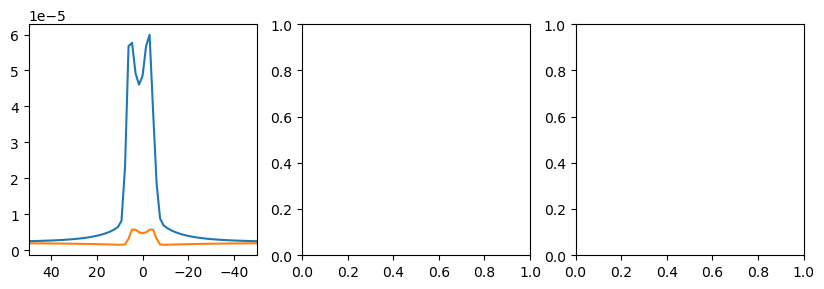

In [38]:
t = 50
fig,ax=plt.subplots(1,3,figsize=(10,3))
ax.flatten()[0].plot(freq,caii_h[t,:])
ax.flatten()[0].plot(freq,caii_h[0,:])
#ax.flatten()[1].plot(hbeta[t,:]-hbeta[0,:])
#ax.flatten()[2].plot(hgamma[t,:]-hgamma[0,:])

ax.flatten()[0].set_xlim([-50,50])
ax.flatten()[0].invert_xaxis()

(30.0, 70.0)

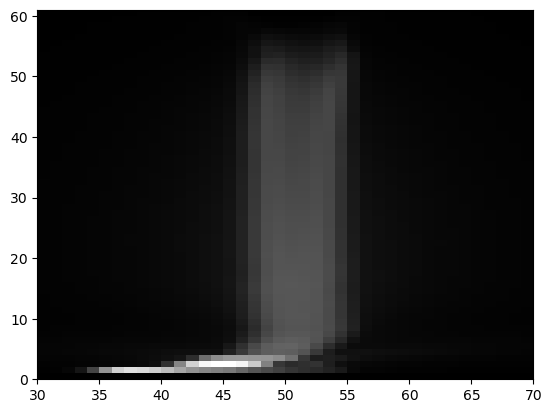

In [39]:
plt.pcolormesh(caii_h[:]-caii_h[0,:],cmap='grey')
plt.xlim([30,70])

(30.0, 70.0)

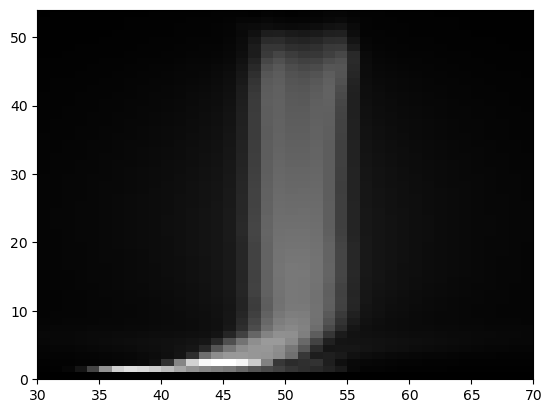

In [15]:
plt.pcolormesh(caii_h[:]-caii_h[0,:],cmap='grey')
plt.xlim([30,70])

(25.0, 75.0)

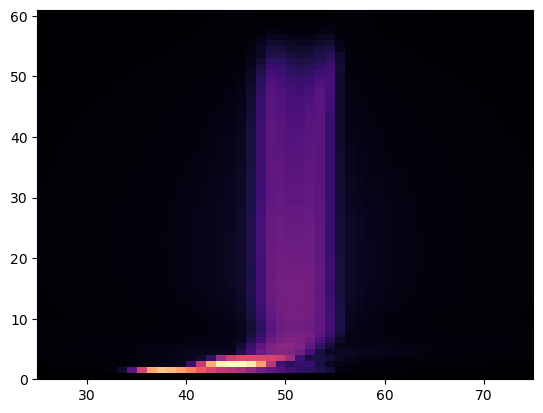

In [40]:
plt.pcolormesh(caii_h[0:1500]-caii_h[0,:],cmap='magma')
plt.xlim([25,75])

(25.0, 75.0)

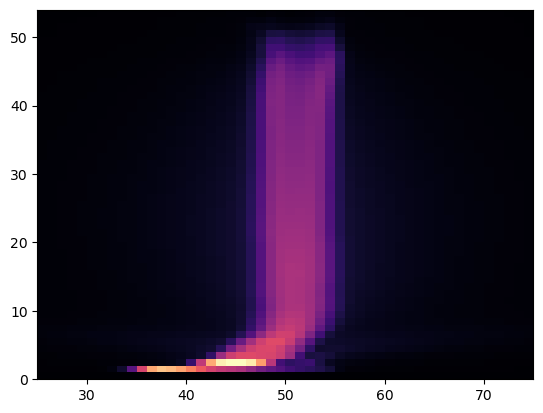

In [16]:
plt.pcolormesh(caii_h[0:1500]-caii_h[0,:],cmap='magma')
plt.xlim([25,75])

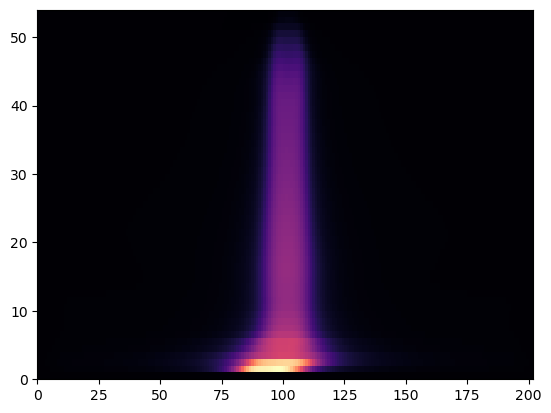

In [18]:
plt.pcolormesh(hbeta[0:1500]-hbeta[0,:],cmap='magma')
#plt.xlim([25,75])

In [31]:
samples = np.arange(1,50,1)
samples

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

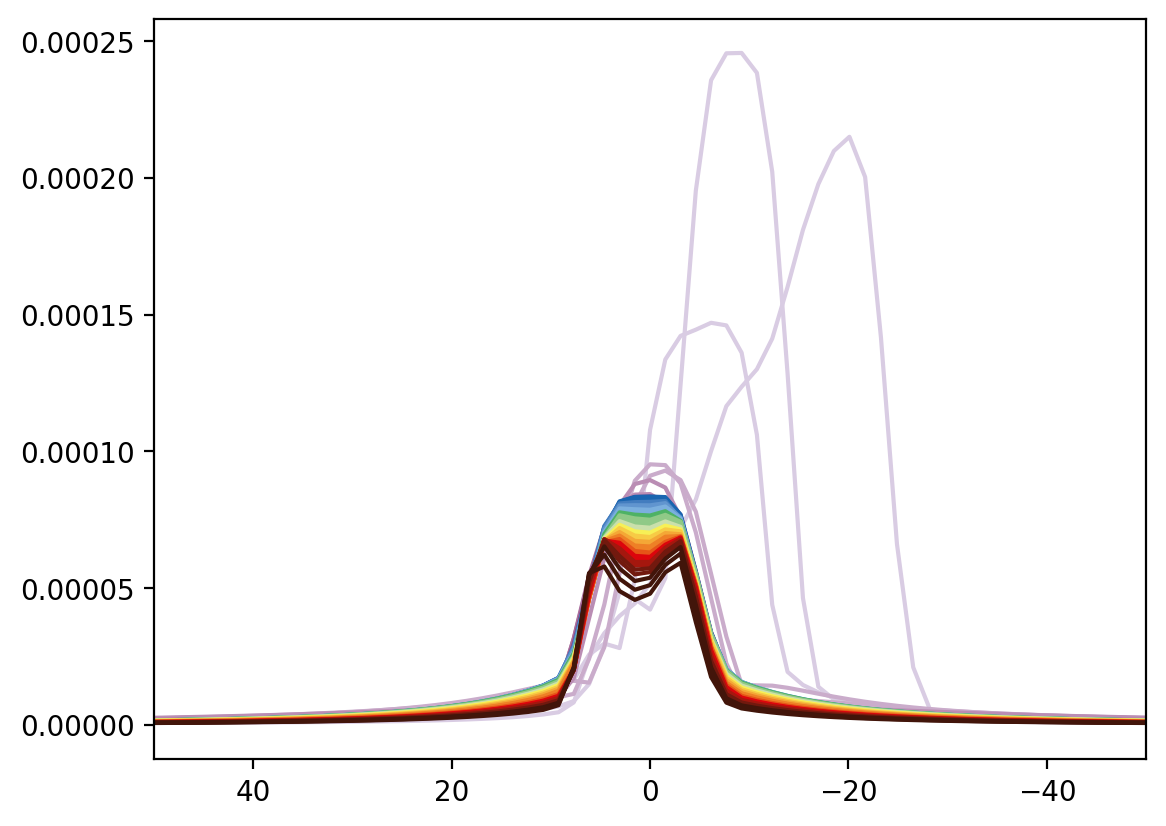

In [41]:
fig,ax=plt.subplots(dpi=200)

numcolor = len(samples)
maps = tol_colors.tol_cmap(colormap='rainbow_discrete',lut=numcolor)
cmap_choice2 = maps(np.linspace(0,1,numcolor))

for i in range(len(samples)):
    ax.plot(freq,caii_h[samples[i],:]-caii_h[0,:],c=cmap_choice2[i],label=i)
#ax.legend()
ax.set_xlim([-50,50])
ax.invert_xaxis()

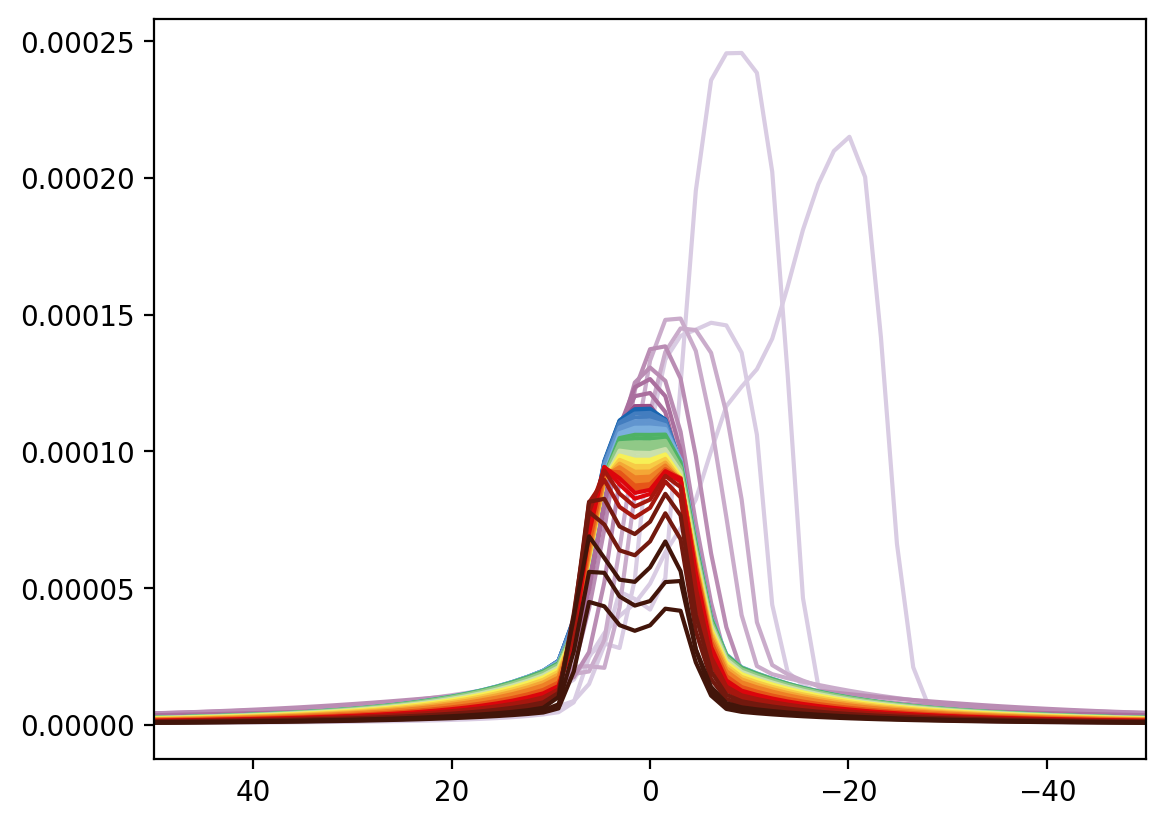

In [32]:
fig,ax=plt.subplots(dpi=200)

numcolor = len(samples)
maps = tol_colors.tol_cmap(colormap='rainbow_discrete',lut=numcolor)
cmap_choice2 = maps(np.linspace(0,1,numcolor))

for i in range(len(samples)):
    ax.plot(freq,caii_h[samples[i],:]-caii_h[0,:],c=cmap_choice2[i],label=i)
#ax.legend()
ax.set_xlim([-50,50])
ax.invert_xaxis()

    

In [870]:
#general script many times
times = np.arange(60)

kr=16 #specify ca II H
lamb0=396.847 # change this and the instances below to wavelength of spectral line in nm as desired (as needed)
c=2.99e5
mu=.5 #viewing angle cos(theta) - choose between 0.05, 0.23, 0.5, 0.77, 0.95
muind = 2 # index corresponding to the value above; 0=0.05, 1=0.23, 2=0.5, 3=0.77, 4=0.95
fwhm=.05 #dkist FWHM
ntw=45 # DKIST NTW

ncol2 = len(timesinit)#+len(times2)
map = tol_colors.tol_cmap(colormap='rainbow_discrete',lut=ncol2)
cmap_choice2 = map(np.linspace(0,1,ncol2))

#filename_updatedradyn = '/Users/coletamburri/Desktop/RADYN_Grid_For_Rahul/15_8_5e10_wRC.sav'
filename_updatedradyn = '/Users/coletamburri/Desktop/longdur_15_8_1e10.sav'
readradyn = readsav(filename_updatedradyn)


q_new = readradyn['q']
nq_new = readradyn['nq']
qnorm_new= readradyn['qnorm']
outintt_new = readradyn['outintt']
nmu_new = readradyn['nmu']

filename_rh = '/Users/coletamburri/Desktop/RH_Versions_and_Tools/RH_output_files_npz/cat_15_8_5e10_wRC_updated_1s_H6_CRD.npz'
rhwls = read_rhversion_CRD['wl_rh']

rhints = np.zeros((len(times),len(rhwls)))

for i in times:
    time = i+1
    
    if time==3 or time==30 or time == 52 or time == 53:
        continue

    filename_rhqs = '/Users/coletamburri/Desktop/RH_Versions_and_Tools/RH_output_files_npz/cat_15_8_5e10_wRC_updated_0s_H6_CRD.npz'
    filename_rh = '/Users/coletamburri/Desktop/RH_Versions_and_Tools/RH_output_files_npz/cat_15_8_5e10_wRC_updated_'+str(time)+'s_H6_CRD.npz'
    filename_dkist = '/Users/coletamburri/Desktop/RH_Versions_and_Tools/RH_output_files_npz/dkist_obs_file.npz'
    
    read_rhversion = np.load(filename_rh)
    read_rhqs = np.load(filename_rhqs)

    rhints[i,:]= read_rhversion['int_rh']


In [872]:
np.median(rhints)

2564276.6430275613

/var/folders/_1/p_v_pt7912z2pqq5nrvwvhlc0000gn/T/ipykernel_52358/2061287209.py:3: RuntimeWarning: divide by zero encountered in log
  ax.pcolormesh(X,Y,np.log(rhints), vmin=0, vmax=np.log(1e8),cmap='magma')
/var/folders/_1/p_v_pt7912z2pqq5nrvwvhlc0000gn/T/ipykernel_52358/2061287209.py:3: RuntimeWarning: invalid value encountered in log
  ax.pcolormesh(X,Y,np.log(rhints), vmin=0, vmax=np.log(1e8),cmap='magma')


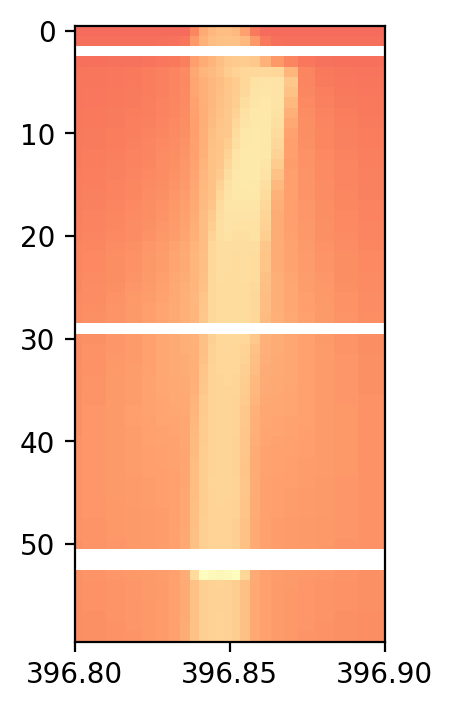

In [874]:
X,Y = np.meshgrid(rhwls,times)
fig,ax=plt.subplots(figsize=(2,4),dpi=200);
ax.pcolormesh(X,Y,np.log(rhints), vmin=0, vmax=np.log(1e8),cmap='magma')
ax.set_xlim([396.8,396.9])
ax.invert_yaxis()

In [876]:
readradyn

{'q': array([[ -10.        ,   -9.9       ,   -9.8       , ...,    9.8       ,
            9.9       ,   10.        ],
        [ -10.        ,   -9.9       ,   -9.8       , ...,    9.8       ,
            9.9       ,   10.        ],
        [-202.25406445, -128.8242093 ,  -85.24716111, ...,   85.24716111,
          128.8242093 ,  202.25406445],
        ...,
        [   3.86456117,  315.26158432,  667.54088934, ...,    0.        ,
            0.        ,    0.        ],
        [   0.89786922,  285.96012921,  607.6837965 , ...,    0.        ,
            0.        ,    0.        ],
        [   1.62889359,  286.70008534,  608.43383309, ...,    0.        ,
            0.        ,    0.        ]], dtype='>f8'),
 'nq': array([201, 201, 201, 201, 201, 201, 201, 201, 201, 201,   7,  28,  13,
          6,   6,   4, 101, 101, 101, 101, 101,   6,   8,   8,   8,   8,
         51,  51, 101,  51,  51,  51,  51,  33,   5,   6,   8,   9,  24,
         34,  34], dtype='>i4'),
 'qnorm': 12.85,
 'outint

In [878]:
np.shape(times)

(60,)

In [880]:
x_new

array([-3.74053000e+02, -3.70453931e+02, -3.66854862e+02, -3.66847000e+02,
       -3.63255794e+02, -3.61847000e+02, -3.59656725e+02, -3.56847000e+02,
       -3.56057656e+02, -3.52458587e+02, -3.51847000e+02, -3.48859519e+02,
       -3.46847000e+02, -3.45260450e+02, -3.41847000e+02, -3.41661381e+02,
       -3.38062312e+02, -3.36847000e+02, -3.34463244e+02, -3.31847000e+02,
       -3.30864175e+02, -3.27265106e+02, -3.26847000e+02, -3.23666037e+02,
       -3.21847000e+02, -3.20066969e+02, -3.16847000e+02, -3.16467900e+02,
       -3.12868831e+02, -3.11847000e+02, -3.09269762e+02, -3.06847000e+02,
       -3.05671000e+02, -3.05670694e+02, -3.02505284e+02, -3.02158472e+02,
       -3.02002117e+02, -3.01931483e+02, -3.01899429e+02, -3.01884740e+02,
       -3.01877867e+02, -3.01874511e+02, -3.01872738e+02, -3.01871677e+02,
       -3.01870617e+02, -3.01868844e+02, -3.01865487e+02, -3.01858614e+02,
       -3.01847000e+02, -3.01843925e+02, -3.01811871e+02, -3.01741237e+02,
       -3.01584882e+02, -

In [882]:
x_new2

array([-4.93796255e+00, -4.85835975e+00, -4.63190841e+00, -4.39160614e+00,
       -4.20283890e+00, -4.05446384e+00, -3.93774739e+00, -3.84584435e+00,
       -3.81917735e+00, -3.77338959e+00, -3.71617800e+00, -3.67091374e+00,
       -3.63501354e+00, -3.60645273e+00, -3.58364438e+00, -3.56534471e+00,
       -3.55057885e+00, -3.53858272e+00, -3.52875746e+00, -3.52063367e+00,
       -3.51384348e+00, -3.50809852e+00, -3.50317281e+00, -3.49888920e+00,
       -3.49510886e+00, -3.49172297e+00, -3.48864625e+00, -3.48581184e+00,
       -3.48316736e+00, -3.48067173e+00, -3.47817610e+00, -3.47553162e+00,
       -3.47269721e+00, -3.46962049e+00, -3.46623460e+00, -3.46245426e+00,
       -3.45817065e+00, -3.45324494e+00, -3.44749998e+00, -3.44070979e+00,
       -3.43258600e+00, -3.42276074e+00, -3.41076461e+00, -3.39599875e+00,
       -3.37769908e+00, -3.35489073e+00, -3.32632992e+00, -3.29042973e+00,
       -3.24516546e+00, -3.18795388e+00, -3.11549912e+00, -3.02359608e+00,
       -3.00425953e+00, -

In [884]:
x

array([ 5.14638725e+00,  3.93167869e+00,  3.00855163e+00,  2.30689690e+00,
        1.77346269e+00,  1.36780130e+00,  1.05919046e+00,  8.24294890e-01,
        6.45390164e-01,  5.09013588e-01,  4.04939504e-01,  3.25400954e-01,
        2.64498503e-01,  2.17751204e-01,  1.81755528e-01,  1.53926306e-01,
        1.32299960e-01,  1.15385041e-01,  1.02048714e-01,  9.14305244e-02,
        8.28769120e-02,  7.58914602e-02,  7.00971134e-02,  6.52074767e-02,
        6.10050177e-02,  5.73245079e-02,  5.40404474e-02,  5.10575119e-02,
        4.83032972e-02,  4.57228083e-02,  4.32742733e-02,  4.09259637e-02,
        3.86537801e-02,  3.64394171e-02,  3.42689705e-02,  3.21318787e-02,
        3.00201189e-02,  2.79275964e-02,  2.58496810e-02,  2.37828541e-02,
        2.17244410e-02,  1.96724076e-02,  1.76252055e-02,  1.55816537e-02,
        1.35408493e-02,  1.15020985e-02,  9.46486361e-03,  7.42872255e-03,
        5.39333641e-03,  3.35842373e-03,  1.32373910e-03, -7.10945523e-04,
       -2.74585820e-03, -

In [886]:
np.min(x)

-5.143739767690245

In [1003]:
x = (doppler_to_wavelength(line,(q_new[kr,:-100]*qnorm_new)-1))+line
x_new = read_rhversion['wl_rh']
#x_new2 = x_new[(x_new>-5) & (x_new<5)]
x_new2 = x_new[(x_new>391.7) & (x_new<402)]
arrs = np.zeros((60,128))

for i in times:
    time = ((i+1)*10)
    print(time)
    arr = ((outintt_new[time,kr,muind,:-101]*1.9e11)-(outintt_new[0,kr,muind,:-101])*1.9e11)/1e6
    f = interp1d(x, arr, kind='linear')

    resampled_arr = f(x_new2)
    arrs[i,:] = resampled_arr

10


ValueError: could not broadcast input array from shape (342,) into shape (128,)

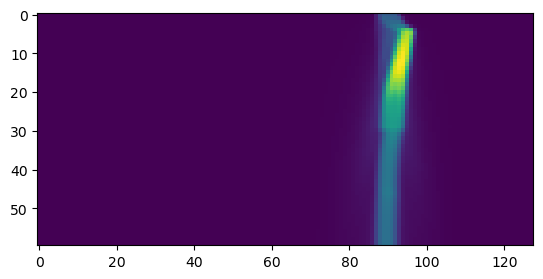

In [890]:
plt.imshow(arrs)

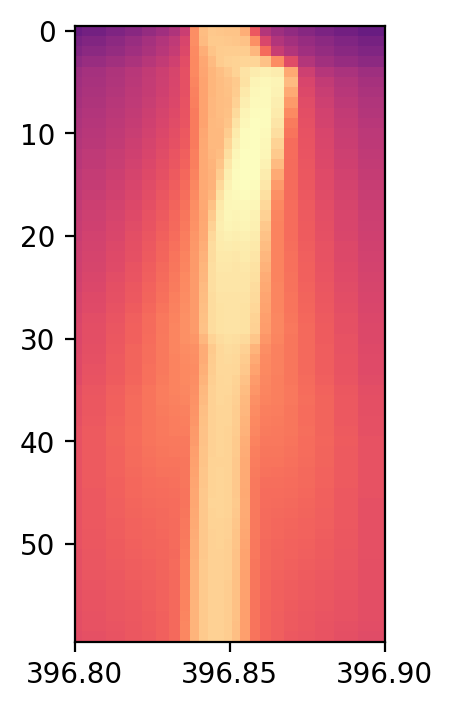

In [754]:
X,Y = np.meshgrid(x_new2,times)
fig,ax=plt.subplots(figsize=(2,4),dpi=200);
ax.pcolormesh(X,Y,np.log10(arrs),cmap='magma')
ax.set_xlim([396.8,396.9])
ax.invert_yaxis()

/var/folders/_1/p_v_pt7912z2pqq5nrvwvhlc0000gn/T/ipykernel_52358/3165054647.py:16: RuntimeWarning: divide by zero encountered in log
  ax2.pcolormesh(X2,Y2,np.log(rhints), vmin=0, vmax=np.log(1e8),cmap='magma')
/var/folders/_1/p_v_pt7912z2pqq5nrvwvhlc0000gn/T/ipykernel_52358/3165054647.py:16: RuntimeWarning: invalid value encountered in log
  ax2.pcolormesh(X2,Y2,np.log(rhints), vmin=0, vmax=np.log(1e8),cmap='magma')


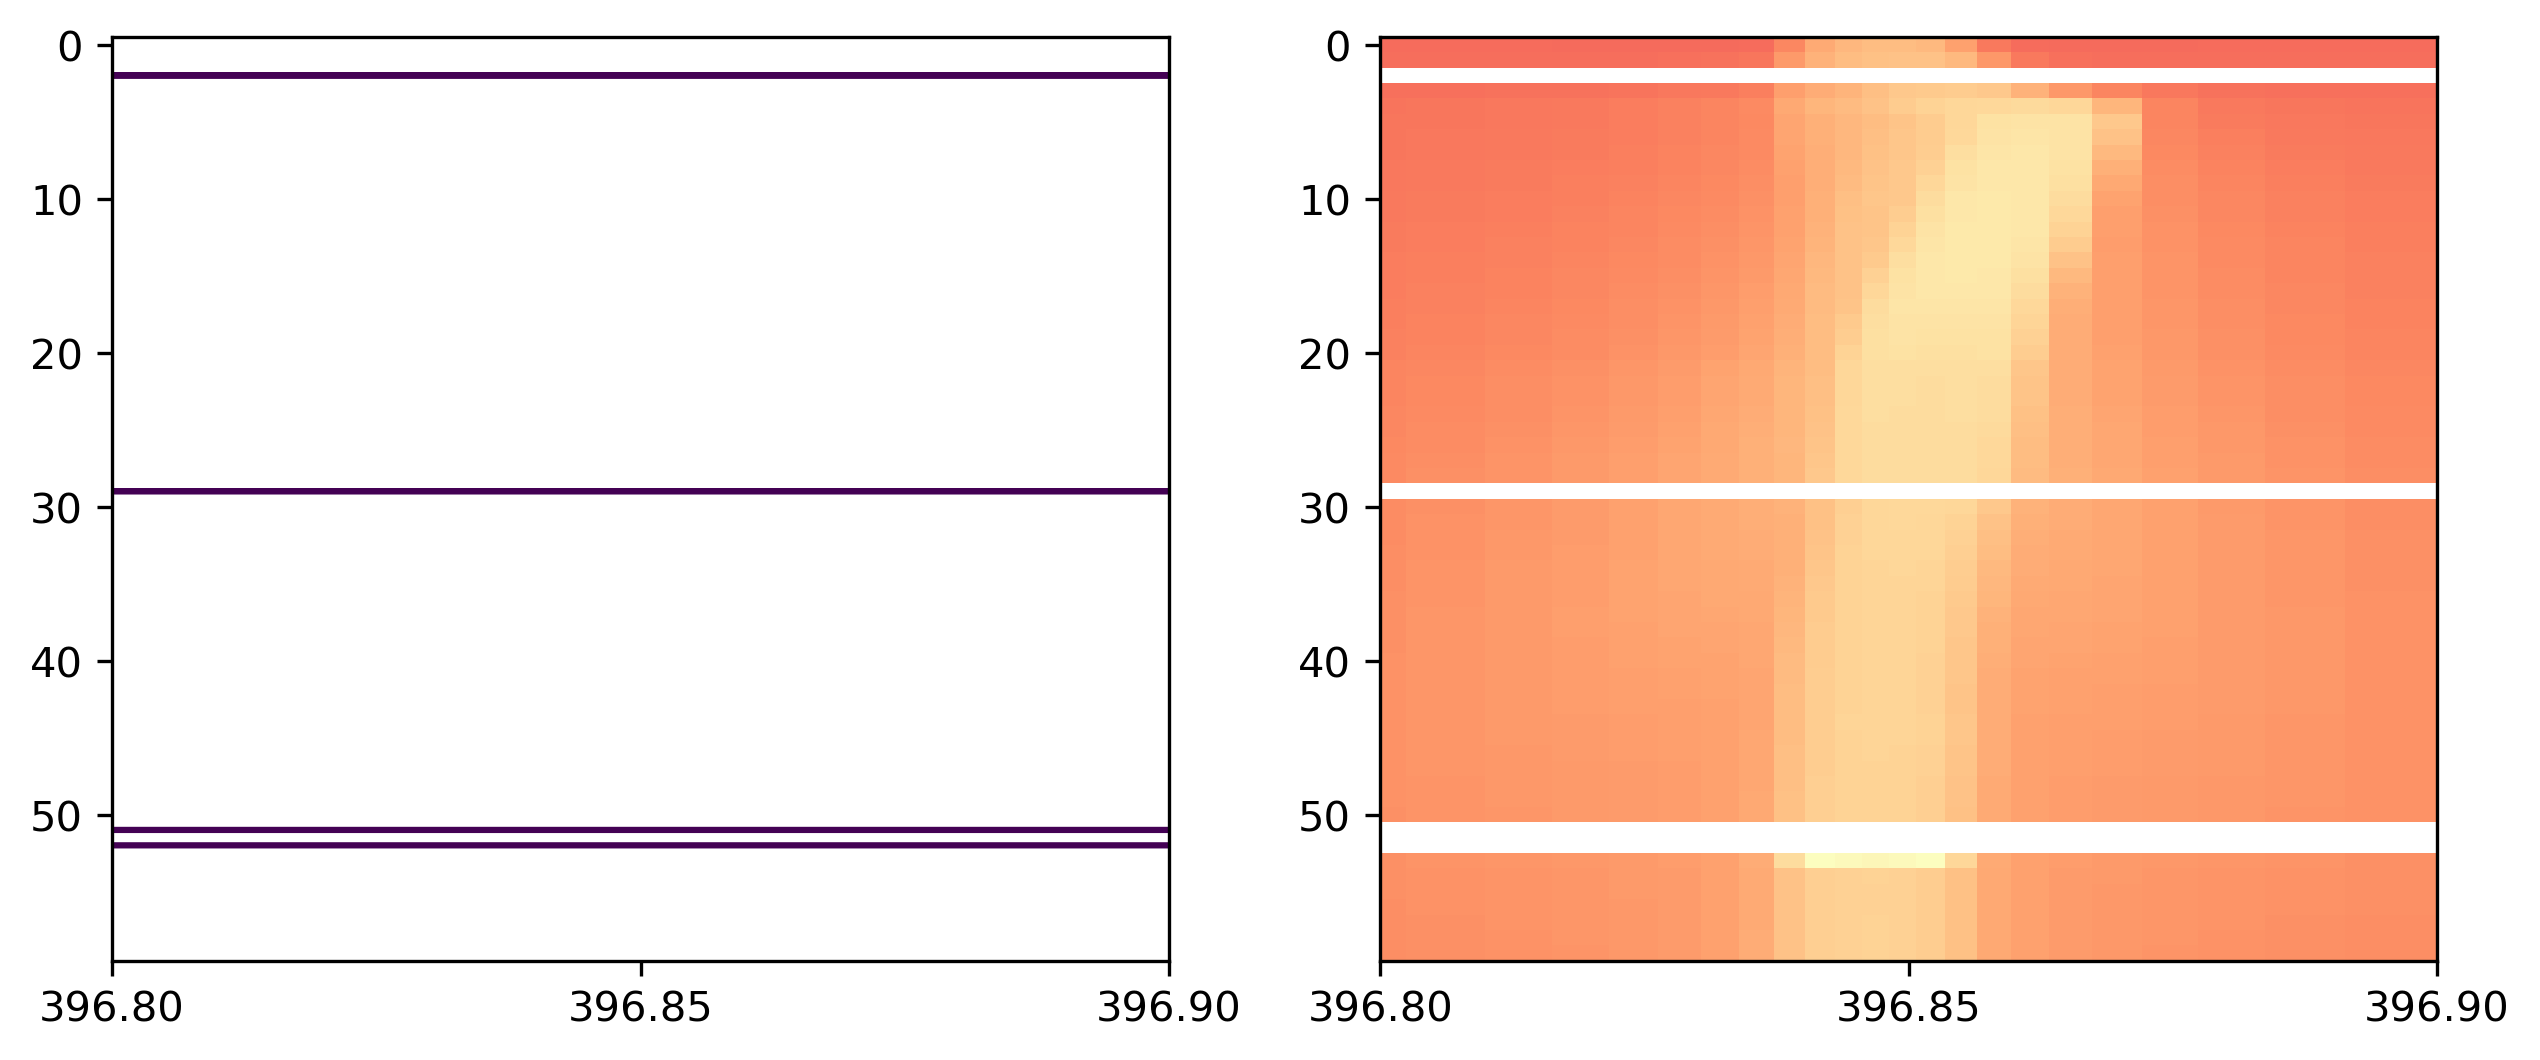

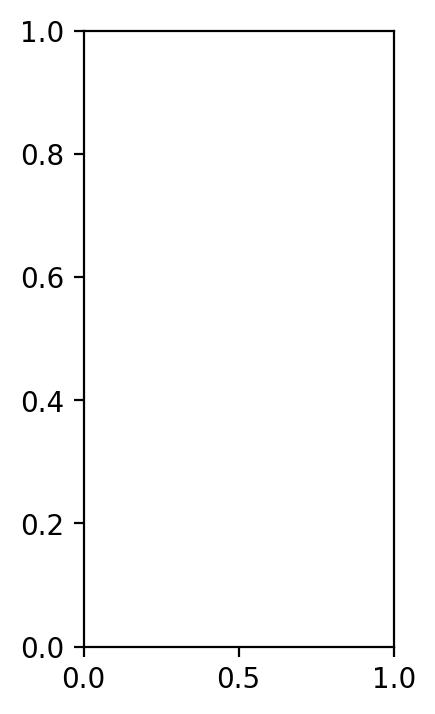

In [930]:
fig,[ax1,ax2]=plt.subplots(1,2,figsize=(10,4),dpi=300);

X,Y = np.meshgrid(x_new2,times)

X2,Y2 = np.meshgrid(rhwls,times)
fig,ax=plt.subplots(figsize=(2,4),dpi=200);
ax1.contour(X2,Y2,rhints)
ax1.pcolormesh(X,Y,np.log10(arrs),cmap='magma')

ax1.set_xlim([396.8,396.9])
ax1.set_xticks([396.8,396.85,396.9])

ax1.invert_yaxis()

X2,Y2 = np.meshgrid(rhwls,times)
ax2.pcolormesh(X2,Y2,np.log(rhints), vmin=0, vmax=np.log(1e8),cmap='magma')
ax2.set_xlim([396.8,396.9])
ax2.set_xticks([396.8,396.85,396.9])
ax2.invert_yaxis()

In [984]:
scipy.signal.normalize(rhints)

TypeError: normalize() missing 1 required positional argument: 'a'

/var/folders/_1/p_v_pt7912z2pqq5nrvwvhlc0000gn/T/ipykernel_52358/2696554123.py:1: RuntimeWarning: divide by zero encountered in log10
  plt.contour(X2,Y2,np.log10(rhints),levels=[0,6.5,7,7.5,8])
/var/folders/_1/p_v_pt7912z2pqq5nrvwvhlc0000gn/T/ipykernel_52358/2696554123.py:1: RuntimeWarning: invalid value encountered in log10
  plt.contour(X2,Y2,np.log10(rhints),levels=[0,6.5,7,7.5,8])


(396.8, 396.9)

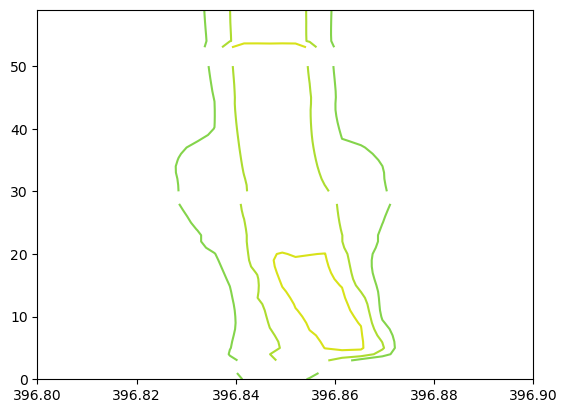

In [980]:
plt.contour(X2,Y2,np.log10(rhints),levels=[0,6.5,7,7.5,8])
plt.xlim([396.8,396.9])

In [992]:
np.max(np.log10(arrs))

1.693816865791244

(-0.05, 0.05)

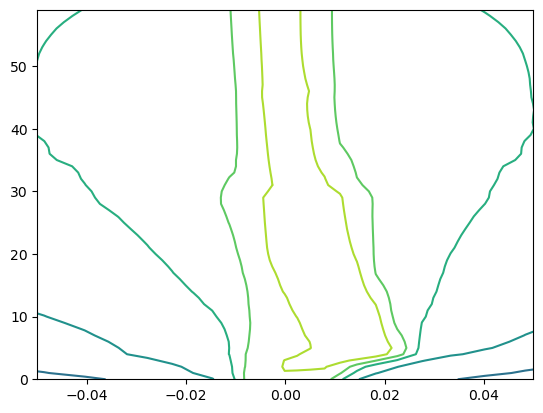

In [998]:
plt.contour(X,Y,np.log10(arrs))
plt.xlim([-0.05,0.05])

In [899]:
# before this, will need to save variables tg1t, z1t, ne1t, pg1t, q, nq, qnorm, outintt, nmu to save file... or access some other way
#filename='/Users/coletamburri/Desktop/radyn_15_8_5e10.sav'
#filename='/Users/coletamburri/Desktop/August_2022_Observations_Paper/radynout.sav'
filename_updatedradyn = '/Users/coletamburri/Desktop/15_8_t3e10_longdur_noRC.sav'
filename_oldradyn = '/Users/coletamburri/Desktop/August_2022_Observations_Paper/radynout.sav'
filename_updatedradyn = '/Users/coletamburri/Desktop/RADYN_Grid_For_Rahul/15_8_5e10_wRC.sav'
filename_rhversion = '/Users/coletamburri/Desktop/RH_Versions_and_Tools/RH_output_files_npz/fchroma30_1b_2vt_43s.npz'
filename_rhversion = '/Users/coletamburri/Desktop/RH_Versions_and_Tools/RH_output_files_npz/cat_15_8_5e10_wRC_updated_48s_H6.npz'
filename_rhversion_CRD = '/Users/coletamburri/Desktop/RH_Versions_and_Tools/RH_output_files_npz/cat_15_8_5e10_wRC_updated_48s_H6_CRD.npz'

filename_rhqs = '/Users/coletamburri/Desktop/RH_Versions_and_Tools/RH_output_files_npz/cat_15_8_5e10_wRC_updated_0s_H6_CRD.npz'
filename_dkist = '/Users/coletamburri/Desktop/RH_Versions_and_Tools/RH_output_files_npz/dkist_obs_file.npz'

# change based on desired line and fwhm of observations

kr=16 #Ca II H - 20 is Ca II 8542
#timesinit = np.arange(0,500,30)
#timesinit = [0,66.7,133.3,200,250,430,480,490,500] #times to print out in plots, in decaseconds
timesinit=[480]
 #decay phase times to print out in plots - will be concatenated to timesinit array
lamb0=396.847 # change this and the instances below to wavelength of spectral line in nm as desired (as needed)
c=2.99e5
mu=.5 #viewing angle cos(theta) - choose between 0.05, 0.23, 0.5, 0.77, 0.95
muind = 2 # index corresponding to the value above; 0=0.05, 1=0.23, 2=0.5, 3=0.77, 4=0.95
fwhm=.05 #dkist FWHM
ntw=45 # DKIST NTW



In [902]:
read_oldradyn = readsav(filename_oldradyn)
read_newradyn = readsav(filename_updatedradyn)
read_rhversion = np.load(filename_rhversion)
read_rhversion_CRD = np.load(filename_rhversion_CRD)
read_rhqs = np.load(filename_rhqs)

In [903]:
ret=doppler_shift(lamb0,read_rhversion['wl_rh'])

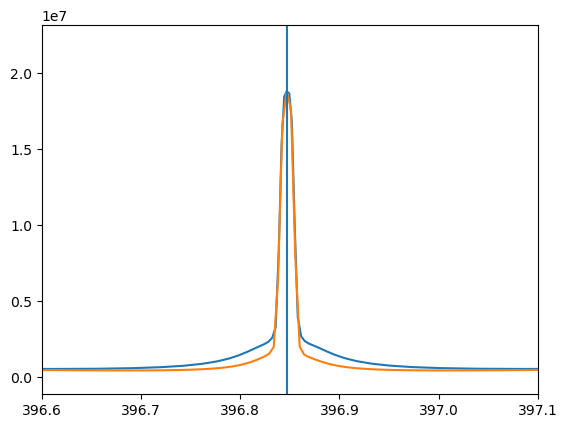

In [906]:
lamb0=396.847
plt.plot(read_rhversion_CRD['wl_rh'],read_rhversion_CRD['int_rh'])
plt.plot(read_rhversion['wl_rh'],read_rhversion['int_rh'])

plt.xlim([396.6,397.1])
plt.axvline(396.847)

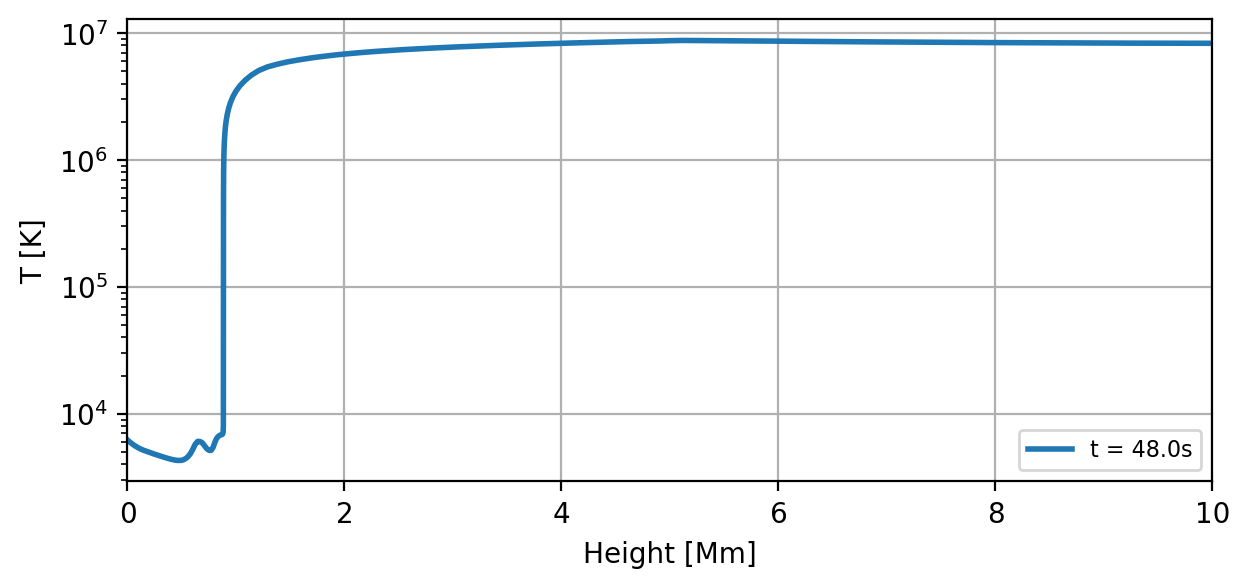

In [907]:
ncol2 = len(timesinit)#+len(times2)
map = tol_colors.tol_cmap(colormap='rainbow_discrete',lut=ncol2)
cmap_choice2 = map(np.linspace(0,1,ncol2))

#cmap_choice2 = ['#332288','#88CCEE','#44AA99','#117733','#999933','#CC6677','#AA4499','#AA4499','#AA4499','#AA4499']

fig,ax=plt.subplots(dpi=200,figsize=(7,3))
for i in range(len(timesinit)):
    ax.plot(read_oldradyn['z1t'][int(timesinit[i]),:]/1e8,(read_oldradyn['tg1t'][int(timesinit[i]),:]),label='t = '+str(round(timesinit[i]/10,2))+'s',linewidth=2)

#for i in range(len(times2)):
#    ax.plot(read['z1t'][int(times2[i]),:]/1e8,(read['tg1t'][int(times2[i]),:]),color=cmap_choice2[len(timesinit)+i],label='t = '+str(round(times2[i]/10,2))+'s',linewidth=2)

ax.grid()
ax.legend(fontsize=8)
ax.set_ylabel('T [K]')
ax.set_xlabel('Height [Mm]')
ax.set_xlim([0,10])
plt.yscale('log')

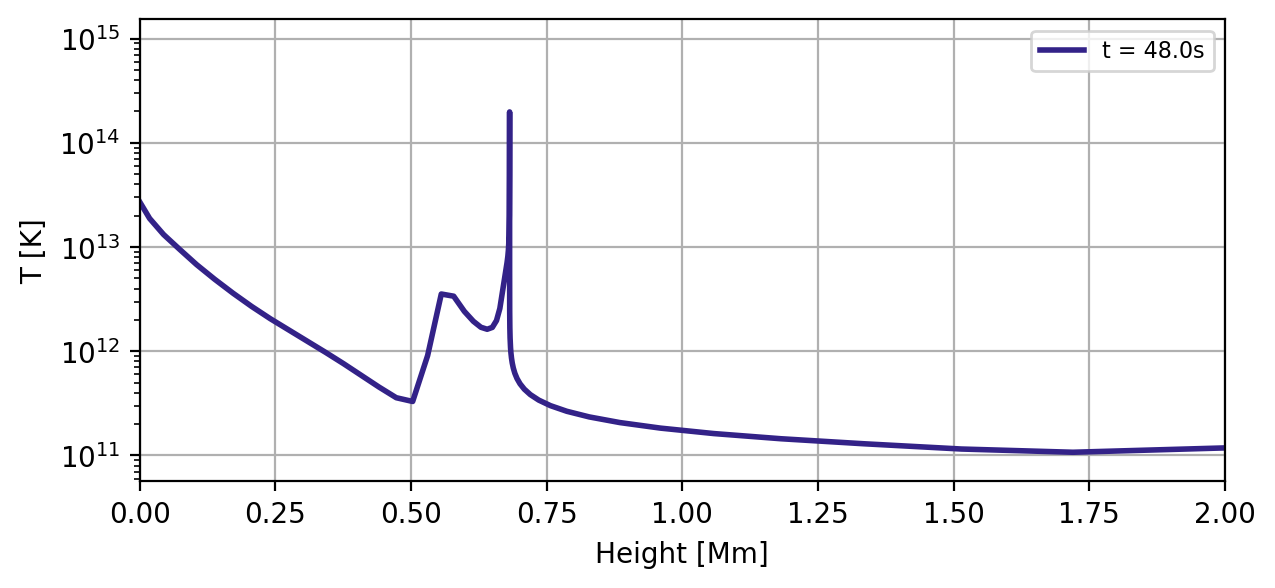

In [344]:


ncol2 = len(timesinit)#+len(times2)
map = tol_colors.tol_cmap(colormap='rainbow_discrete',lut=ncol2)
cmap_choice2 = map(np.linspace(0,1,ncol2))



cmap_choice2 = ['#332288','#88CCEE','#44AA99','#117733','#999933','#CC6677','#AA4499','#AA4499','#AA4499','#AA4499']

fig,ax=plt.subplots(dpi=200,figsize=(7,3))
for i in range(len(timesinit)):
    ax.plot(read_newradyn['z1t'][int(timesinit[i]),:]/1e8,(read_newradyn['ne1t'][int(timesinit[i]),:]),color=cmap_choice2[i],label='t = '+str(round(timesinit[i]/10,2))+'s',linewidth=2)

#for i in range(len(times2)):
#    ax.plot(read['z1t'][int(times2[i]),:]/1e8,(read['ne1t'][int(times2[i]),:]),color=cmap_choice2[len(timesinit)+i],label='t = '+str(round(times2[i]/10,2))+'s',linewidth=2)

ax.grid()
ax.legend(fontsize=8)
ax.set_ylabel('T [K]')
ax.set_xlabel('Height [Mm]')
ax.set_xlim([0,2])
plt.yscale('log')

In [346]:
read_oldradyn['qnorm']

10.0

In [348]:
q = read_oldradyn['q']
nq = read_oldradyn['nq']
qnorm = read_oldradyn['qnorm']
outintt = read_oldradyn['outintt']
nmu = read_oldradyn['nmu']

q_new = read_newradyn['q']
nq_new = read_newradyn['nq']
qnorm_new= read_newradyn['qnorm']
outintt_new = read_newradyn['outintt']
nmu_new = read_newradyn['nmu']
#q[0:nq[kr]-1,kr]*qnorm,outintt[1:nq[kr],nmu-1,kr,*]

In [350]:
cmap_choice2 = ['#332288','#88CCEE','#44AA99','#117733','#999933','#CC6677','#AA4499','#AA4499','#AA4499','#AA4499']
#cmap_choice2 = plt.cm.jet(np.linspace(0,1,len(timesinit)))

wavelengths = (doppler_shift_to_wavelength(396.847,q[kr,:-1]*qnorm))

fig,ax=plt.subplots(figsize=(9,9),dpi=400)
for i in range(len(timesinit)):
    #if i==2:
    #    #ax.plot((doppler_shift_to_wavelength(396.8,q[kr,:-1]*qnorm)),(psf_adjust(wavelengths/u.nm, outintt[int(timesinit[i]),kr,muind,:-2]*1.9e11,fwhm,wavelengths/u.nm,ntw,gaussian_psf)/1e6)-(5*i),marker='o',color=cmap_choice2[i],label='t = '+str(round(timesinit[i]/10,2))+'s',linewidth=3)
    #    ax.plot((doppler_shift_to_wavelength(396.8,q[kr,:-1]*qnorm)),(psf_adjust(wavelengths/u.nm, outintt[int(timesinit[i]),kr,muind,:-2]*1.9e11-outintt[int(timesinit[0]),kr,muind,:-2]*1.9e11,fwhm,wavelengths/u.nm,ntw,gaussian_psf)/1e6)-(5*i),color=cmap_choice2[-i],label='t = '+str(round(timesinit[i]/10,2))+'s',linewidth=3)

    #else:
    ax.plot((doppler_shift_to_wavelength(396.847,q_new[kr,:-1]*qnorm_new)),(psf_adjust(wavelengths/u.nm, outintt_new[int(timesinit[i]),kr,muind,:-2]*1.9e11-outintt_new[0,kr,muind,:-2]*1.9e11,fwhm,wavelengths/u.nm,ntw,gaussian_psf)/1e6)-(5*i),color=cmap_choice2[i],label='t = '+str(round(timesinit[i]/10,2))+'s',linewidth=3)
       
    ax.set_xlim([.09,-.09])
xvals = np.zeros(30)
for i in range(len(xvals)):
    xvals[i] = -0.04
labelLines(plt.gca().get_lines(),align=True,xvals=xvals,color='k',fontsize=15)

#for i in range(len(times2)):
#    ax.plot((doppler_shift_to_wavelength(854.2,q[kr,:-110]*qnorm)),psf_adjust(wavelengths/u.nm, outintt[int(times2[i]),kr,muind,:-111]*1.9e11,fwhm,wavelengths/u.nm,ntw,gaussian_psf)/1e6,color=cmap_choice2[len(timesinit)+i],label='t = '+str(round(times2[i]/10,2))+'s',linewidth=3)
plt.gca().invert_xaxis()
#ax.legend()
#ax.axvline(0,c='black')
ax.grid()
#ax.set_ylabel(r'Intensity [$10^6\;erg\;cm^{-2}\;sr^{-1}\;\AA^{-1}$]')
secaxx = ax.secondary_xaxis('top', functions=(veltrans,wltrans))
secaxx.set_xlabel(r'Velocity $[km\; s^{-1}]$',fontsize=15)
ax.set_xlabel(r'Wavelength ($\lambda - \lambda_c$) [nm]',fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=12)
secaxx.tick_params(axis='both', which='major', labelsize=12)
#ax.yaxis.
ax.yaxis.set_ticks([])

NameError: name 'doppler_shift_to_wavelength' is not defined

In [352]:
def min_max_normalize(data):
        min_val = min(data)
        max_val = max(data)
        normalized_data = [(x - min_val) / (max_val - min_val) for x in data]
        return normalized_data

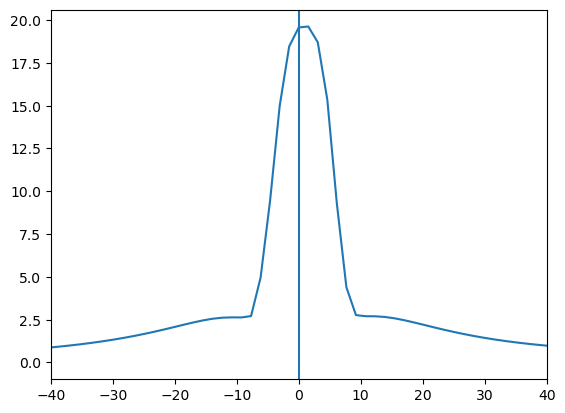

In [356]:
plt.plot(q_new[kr,:-100]*qnorm_new,((outintt_new[480,kr,muind,:-101]*1.9e11)-(outintt_new[0,kr,muind,:-101])*1.9e11)/1e6)
plt.xlim([-40,40])
plt.axvline(0)

In [358]:
cmap_choice2 = ['#332288','#88CCEE','#44AA99','#117733','#999933','#CC6677','#AA4499','#AA4499','#AA4499','#AA4499']
#cmap_choice2 = plt.cm.jet(np.linspace(0,1,len(timesinit)))

line = 396.847
#line = 854.21
wavelengths = (doppler_shift_to_wavelength(line,q[kr,:-1]*qnorm))

wavelengths_rh = doppler_shift_to_wavelength(line,read_rhversion['wl_rh'])

fig,ax=plt.subplots(figsize=(9,5),dpi=400)
i=-1
#ax.plot((doppler_shift_to_wavelength(396.847,q[kr,:-1]*qnorm)),(psf_adjust(wavelengths/u.nm, (outintt[int(timesinit[i]),kr,muind,:-2]-outintt[0,kr,muind,:-2])*1.9e11,fwhm,wavelengths/u.nm,ntw,gaussian_psf)/1e6),color=cmap_choice2[i],label='t = '+str(round(timesinit[i]/10,2))+'s',linewidth=3)
#ax.plot((doppler_shift_to_wavelength(396.847,q[kr,:-1]*qnorm)),min_max_normalize(psf_adjust(wavelengths/u.nm, (outintt[int(timesinit[i]),kr,muind,:-2])*1.9e11,fwhm,wavelengths/u.nm,ntw,gaussian_psf)/1e6),color=cmap_choice2[i],label='t = '+str(round(timesinit[i]/10,2))+'s',linewidth=3)

#ax.plot(q_new[kr,:-100]*qnorm_new,((outintt_new[520,kr,muind,:-101]*1.9e11)-(outintt_new[0,kr,muind,:-101])*1.9e11)/1e6,color=cmap_choice2[i],label='t = '+str(round(timesinit[i]/10,2))+'s, RADYN',linewidth=3)
ax.plot(q_new[kr,:-100],((outintt_new[480,kr,muind,:-101]*1.9e11)-(outintt_new[0,kr,muind,:-101])*1.9e11)/1e6,color=cmap_choice2[i],label='t = '+str(round(timesinit[i]/10,2))+'s, RADYN',linewidth=3)
#ax.plot((doppler_shift_to_wavelength(396.847,q_new[kr,:-1]*qnorm_new)),min_max_normalize(psf_adjust(wavelengths/u.nm, (outintt_new[int(timesinit[i]),kr,muind,:-2])*1.9e11,fwhm,wavelengths/u.nm,ntw,gaussian_psf)/1e6),color=cmap_choice2[i],label='t = '+str(round(timesinit[i]/10,2))+'s',linewidth=3)
#ax.plot((doppler_shift_to_wavelength(line,q_new[kr,:-100]*qnorm_new)),((outintt_new[0,kr,muind,:-101])*1.9e11)/1e6,color=cmap_choice2[i],label='t = '+str(round(timesinit[i]/10,2))+'s, RADYN',linewidth=3)


#ax.set_xlim([.09,-.09])
xvals = np.zeros(30)
for i in range(len(xvals)):
    xvals[i] = -0.04
#labelLines(plt.gca().get_lines(),align=True,xvals=xvals,color='k',fontsize=15)

#for i in range(len(times2)):
#    ax.plot((doppler_shift_to_wavelength(854.2,q[kr,:-110]*qnorm)),psf_adjust(wavelengths/u.nm, outintt[int(times2[i]),kr,muind,:-111]*1.9e11,fwhm,wavelengths/u.nm,ntw,gaussian_psf)/1e6,color=cmap_choice2[len(timesinit)+i],label='t = '+str(round(times2[i]/10,2))+'s',linewidth=3)
#plt.gca().invert_xaxis()
#ax.legend()
#ax.axvline(0,c='black')
ax.grid()
ax.set_ylabel(r'Intensity [$10^6\;erg\;cm^{-2}\;sr^{-1}\;\AA^{-1}$]')
#secaxx = ax.secondary_xaxis('top', functions=(veltrans,wltrans))
#secaxx.set_xlabel(r'Velocity $[km\; s^{-1}]$',fontsize=15)
ax.set_xlabel(r'Wavelength ($\lambda - \lambda_c$) [nm]',fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=12)
#secaxx.tick_params(axis='both', which='major', labelsize=12)


#ax.plot(read_rhversion['wl_rh']-line,(psf_adjust(wavelengths_rh,read_rhversion['int_rh'],fwhm,wavelengths_rh,ntw,gaussian_psf)/1e6))
#ax.plot(read_rhversion_CRD['wl_rh']-line,(read_rhversion_CRD['int_rh']/1e6)-(read_rhqs['int_rh'][5:879]/1e6),label='RADYN+RH')
#ax.plot(read_rhversion_CRD['wl_rh']-line,(read_rhqs['int_rh'][5:879]/1e6),label='RADYN+RH')

#ax.plot(read_rhversion['wl_rh']-396.847,min_max_normalize(psf_adjust(wavelengths_rh,read_rhversion['int_rh'],fwhm/10,wavelengths_rh,ntw,gaussian_psf)/1e6))
#ax.set_ylim([0,0.6])
ax.set_xlim([-5,5])
#ax.set_ylim([-10,40])
ax.legend()

NameError: name 'doppler_shift_to_wavelength' is not defined

In [360]:
rest_wave=396.847
arr = ((outintt_new[480,kr,muind,:-101]*1.9e11)-(outintt_new[0,kr,muind,:-101])*1.9e11)/1e6
x = (doppler_to_wavelength(q_new[kr,:-100]*qnorm_new,rest_wave))
f = interp1d(x, arr, kind='linear')
x_new = read_rhversion_CRD['wl_rh']-line
x_new =x_new[(x_new>-5) & (x_new<5)]
resampled_arr = f(x_new)

In [362]:
x = (doppler_to_wavelength(line,q_new[kr,:-100]*qnorm_new))
f = interp1d(x, arr, kind='linear')
x_new = read_rhversion_CRD['wl_rh']-line
x_new2 = x_new[(x_new>-5) & (x_new<5)]

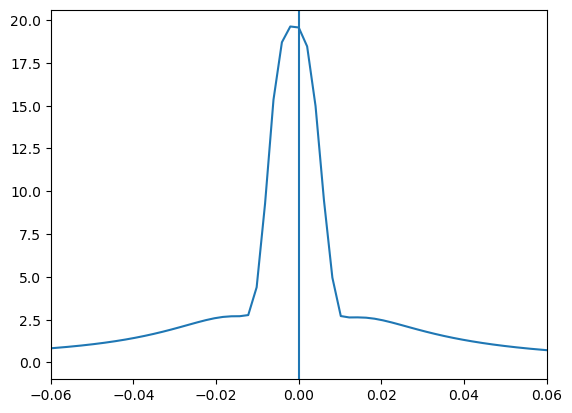

In [364]:
plt.plot((doppler_to_wavelength(q_new[kr,:-100]*qnorm_new,line)),arr)
plt.xlim([-0.06,0.06])
plt.axvline(0)

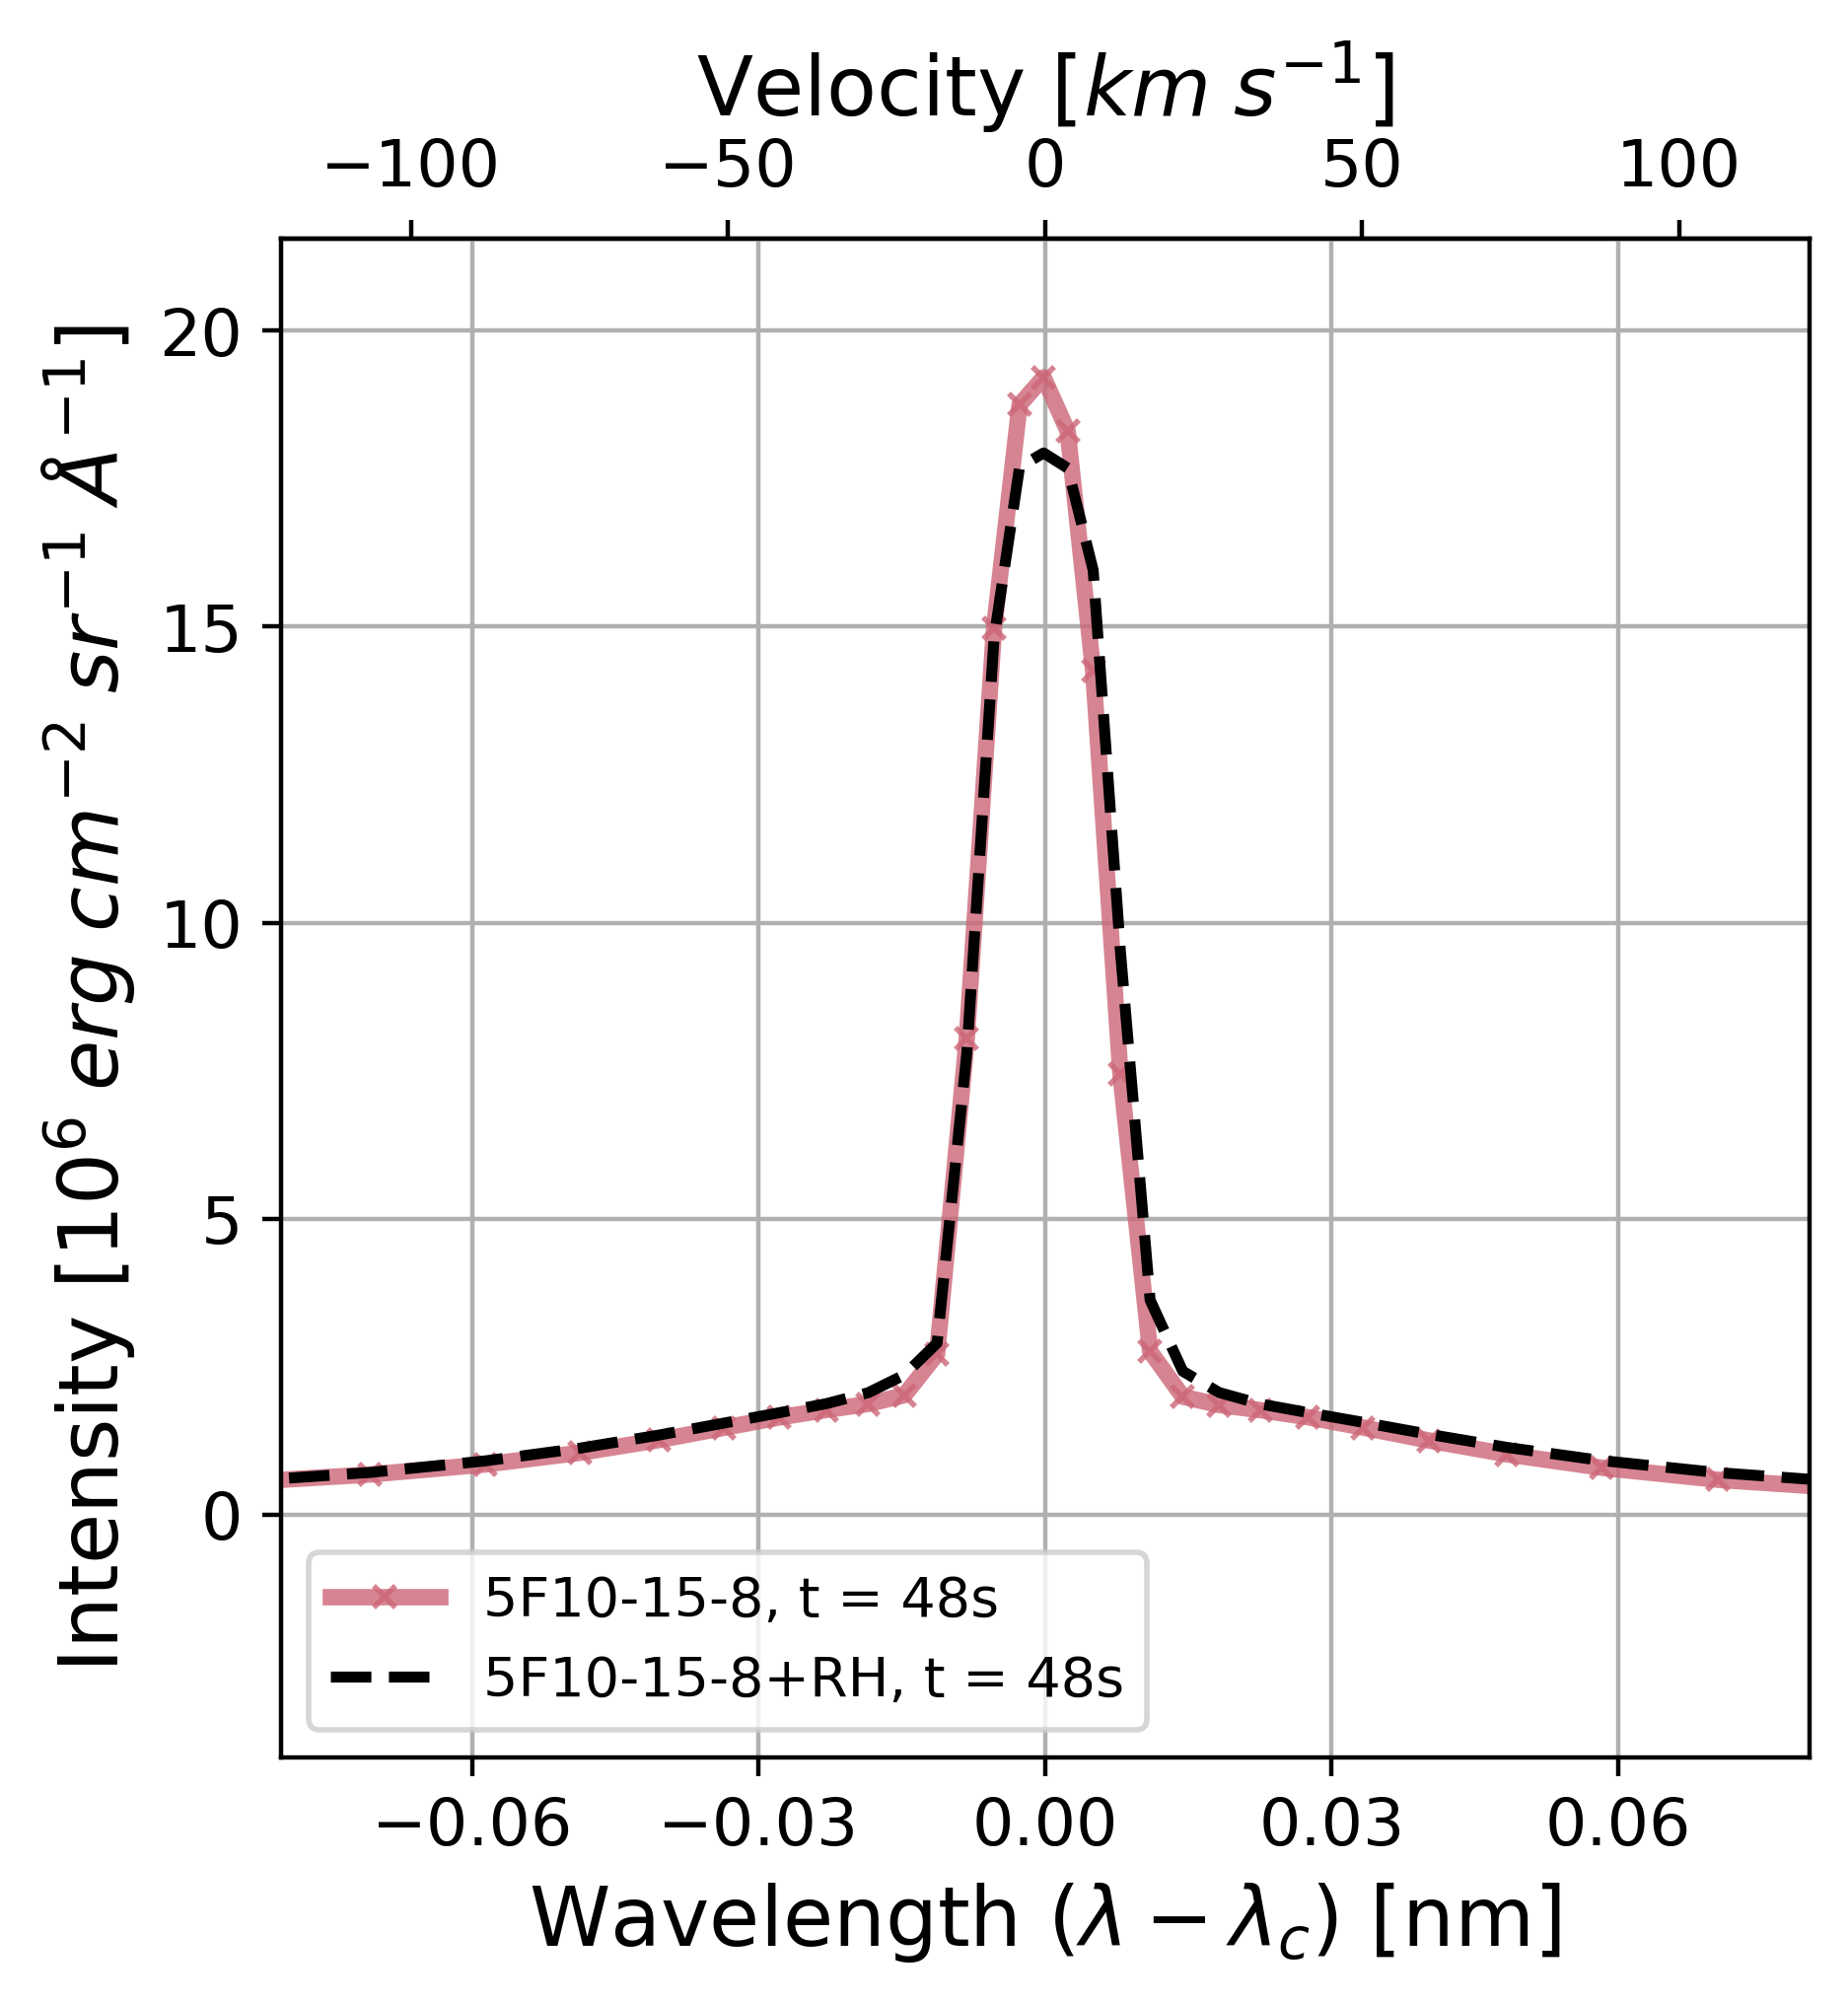

In [1000]:
cmap_choice2 = ['#332288','#88CCEE','#44AA99','#117733','#999933','#CC6677','#AA4499','#AA4499','#AA4499','#AA4499']
#cmap_choice2 = plt.cm.jet(np.linspace(0,1,len(timesinit)))

line = 396.847
line2 = 396.847
#line = 854.21


fig,ax=plt.subplots(figsize=(5,5),dpi=400)
i=-1

#ax.plot((doppler_shift_to_wavelength(396.847,q[kr,:-1]*qnorm)),(psf_adjust(wavelengths/u.nm, (outintt[int(timesinit[i]),kr,muind,:-2]-outintt[0,kr,muind,:-2])*1.9e11,fwhm,wavelengths/u.nm,ntw,gaussian_psf)/1e6),color=cmap_choice2[i],label='t = '+str(round(timesinit[i]/10,2))+'s',linewidth=3)
#ax.plot((doppler_shift_to_wavelength(396.847,q[kr,:-1]*qnorm)),min_max_normalize(psf_adjust(wavelengths/u.nm, (outintt[int(timesinit[i]),kr,muind,:-2])*1.9e11,fwhm,wavelengths/u.nm,ntw,gaussian_psf)/1e6),color=cmap_choice2[i],label='t = '+str(round(timesinit[i]/10,2))+'s',linewidth=3)

arr = ((outintt_new[560,kr,muind,:-101]*1.9e11)-(outintt_new[0,kr,muind,:-101])*1.9e11)/1e6
x = (doppler_to_wavelength(line,(q_new[kr,:-100]*qnorm_new-1)))
f = interp1d(x, arr, kind='linear')
x_new = read_rhversion_CRD['wl_rh']-line
x_new2 = x_new[(x_new>-5) & (x_new<5)]
resampled_arr = f(x_new2)

ax.plot(x_new2,resampled_arr,label='5F10-15-8, t = 48s',marker='x',linewidth=3,c=cmap_choice2[5],markersize=4,alpha=0.8)
#ax.plot((doppler_shift_to_wavelength(line,q_new[kr,:-100]*qnorm_new)),((outintt_new[480,kr,muind,:-101]*1.9e11)-(outintt_new[0,kr,muind,:-101])*1.9e11)/1e6,color=cmap_choice2[i],label='t = '+str(round(timesinit[i]/10,2))+'s, RADYN',linewidth=3)
#ax.plot((doppler_shift_to_wavelength(396.847,q_new[kr,:-1]*qnorm_new)),min_max_normalize(psf_adjust(wavelengths/u.nm, (outintt_new[int(timesinit[i]),kr,muind,:-2])*1.9e11,fwhm,wavelengths/u.nm,ntw,gaussian_psf)/1e6),color=cmap_choice2[i],label='t = '+str(round(timesinit[i]/10,2))+'s',linewidth=3)
#ax.plot((doppler_shift_to_wavelength(line,q_new[kr,:-100]*qnorm_new)),((outintt_new[0,kr,muind,:-101])*1.9e11)/1e6,color=cmap_choice2[i],label='t = '+str(round(timesinit[i]/10,2))+'s, RADYN',linewidth=3)


ax.set_xlim([.08,-.08])
xvals = np.zeros(30)
for i in range(len(xvals)):
    xvals[i] = -0.04
#labelLines(plt.gca().get_lines(),align=True,xvals=xvals,color='k',fontsize=15)

#for i in range(len(times2)):
#    ax.plot((doppler_shift_to_wavelength(854.2,q[kr,:-110]*qnorm)),psf_adjust(wavelengths/u.nm, outintt[int(times2[i]),kr,muind,:-111]*1.9e11,fwhm,wavelengths/u.nm,ntw,gaussian_psf)/1e6,color=cmap_choice2[len(timesinit)+i],label='t = '+str(round(times2[i]/10,2))+'s',linewidth=3)
plt.gca().invert_xaxis()
#ax.legend()
#ax.axvline(0,c='black')
ax.grid()
ax.set_ylabel(r'Intensity [$10^6\;erg\;cm^{-2}\;sr^{-1}\;\AA^{-1}$]',fontsize=15)
secaxx = ax.secondary_xaxis('top', functions=(veltrans,wltrans))
secaxx.set_xlabel(r'Velocity $[km\; s^{-1}]$',fontsize=15)
ax.set_xlabel(r'Wavelength ($\lambda - \lambda_c$) [nm]',fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=12)
secaxx.tick_params(axis='both', which='major', labelsize=12)
ax.set_xticks([-0.06,-0.03,0,0.03,0.06])

#ax.plot(read_rhversion['wl_rh']-line,(psf_adjust(wavelengths_rh,read_rhversion['int_rh'],fwhm,wavelengths_rh,ntw,gaussian_psf)/1e6))
ax.plot(rhwls-line2,(rhints[48,:]/1e6)-(read_rhqs['int_rh'][5:879]/1e6),label='5F10-15-8+RH, t = 48s',linewidth=2,markersize=4,alpha=1,c='black',linestyle='--')
#ax.plot(read_rhversion_CRD['wl_rh']-line,(read_rhqs['int_rh'][5:879]/1e6),label='RADYN+RH')

shift = read_rhversion_CRD['wl_rh']-line
inds1 = np.where((shift>-0.2) & (shift<0.2))
inds2 = np.where((x_new2>-0.2) & (x_new2<0.2))

#percdiff = 100*((resampled_arr[inds2]-rhv[inds1])/rhv[inds1])

#ax2.plot(x_new2[inds2],percdiff,c='#CC6677',marker='s')
#ax2.set_ylim([-50,50])
#ax2.set_ylabel('% Difference')
#ax.plot(read_rhversion['wl_rh']-396.847,min_max_normalize(psf_adjust(wavelengths_rh,read_rhversion['int_rh'],fwhm/10,wavelengths_rh,ntw,gaussian_psf)/1e6))
#ax.set_ylim([0,0.6])
#ax.set_xlim([-.05,.05])
#ax.set_ylim([-10,28])
ax.legend()


In [784]:
rhwls-line2

array([-3.74053000e+02, -3.70453931e+02, -3.66854862e+02, -3.66847000e+02,
       -3.63255794e+02, -3.61847000e+02, -3.59656725e+02, -3.56847000e+02,
       -3.56057656e+02, -3.52458587e+02, -3.51847000e+02, -3.48859519e+02,
       -3.46847000e+02, -3.45260450e+02, -3.41847000e+02, -3.41661381e+02,
       -3.38062312e+02, -3.36847000e+02, -3.34463244e+02, -3.31847000e+02,
       -3.30864175e+02, -3.27265106e+02, -3.26847000e+02, -3.23666037e+02,
       -3.21847000e+02, -3.20066969e+02, -3.16847000e+02, -3.16467900e+02,
       -3.12868831e+02, -3.11847000e+02, -3.09269762e+02, -3.06847000e+02,
       -3.05671000e+02, -3.05670694e+02, -3.02505284e+02, -3.02158472e+02,
       -3.02002117e+02, -3.01931483e+02, -3.01899429e+02, -3.01884740e+02,
       -3.01877867e+02, -3.01874511e+02, -3.01872738e+02, -3.01871677e+02,
       -3.01870617e+02, -3.01868844e+02, -3.01865487e+02, -3.01858614e+02,
       -3.01847000e+02, -3.01843925e+02, -3.01811871e+02, -3.01741237e+02,
       -3.01584882e+02, -

In [828]:
rhwls

array([  22.794     ,   26.39306875,   29.9921375 ,   30.        ,
         33.59120626,   35.        ,   37.19027501,   40.        ,
         40.78934376,   44.38841251,   45.        ,   47.98748126,
         50.        ,   51.58655001,   55.        ,   55.18561877,
         58.78468752,   60.        ,   62.38375627,   65.        ,
         65.98282502,   69.58189377,   70.        ,   73.18096252,
         75.        ,   76.78003128,   80.        ,   80.37910003,
         83.97816878,   85.        ,   87.57723753,   90.        ,
         91.176     ,   91.17630628,   94.34171579,   94.68852764,
         94.84488259,   94.91551702,   94.94757052,   94.96225957,
         94.96913327,   94.97248945,   94.97426247,   94.97532294,
         94.97638341,   94.97815643,   94.98151261,   94.98838631,
         95.        ,   95.00307537,   95.03512886,   95.1057633 ,
         95.26211824,   95.6089301 ,   96.60591295,   96.96104827,
         97.12115573,   97.19348538,   97.22630816,   97.24134

(-0.08, 0.08)

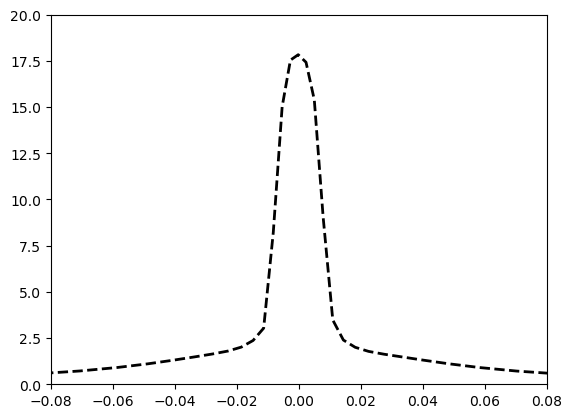

In [850]:
plt.plot(rhwls-line2,(rhints[50,:]/1e6)-(read_rhqs['int_rh'][5:879]/1e6),linewidth=2,markersize=4,alpha=1,c='black',linestyle='--')
plt.ylim([0,20])
plt.xlim([-0.08,0.08])

In [918]:
np.shape(outintt_new)

(682, 41, 5, 202)

In [914]:
cmap_choice2 = ['#332288','#88CCEE','#44AA99','#117733','#999933','#CC6677','#AA4499','#AA4499','#AA4499','#AA4499']
#cmap_choice2 = plt.cm.jet(np.linspace(0,1,len(timesinit)))

line = 396.847
line2 = 396.847
#line = 854.21


i=-1

#ax.plot((doppler_shift_to_wavelength(396.847,q[kr,:-1]*qnorm)),(psf_adjust(wavelengths/u.nm, (outintt[int(timesinit[i]),kr,muind,:-2]-outintt[0,kr,muind,:-2])*1.9e11,fwhm,wavelengths/u.nm,ntw,gaussian_psf)/1e6),color=cmap_choice2[i],label='t = '+str(round(timesinit[i]/10,2))+'s',linewidth=3)
#ax.plot((doppler_shift_to_wavelength(396.847,q[kr,:-1]*qnorm)),min_max_normalize(psf_adjust(wavelengths/u.nm, (outintt[int(timesinit[i]),kr,muind,:-2])*1.9e11,fwhm,wavelengths/u.nm,ntw,gaussian_psf)/1e6),color=cmap_choice2[i],label='t = '+str(round(timesinit[i]/10,2))+'s',linewidth=3)



fig,ax=plt.subplots(6,10,dpi=500,figsize=(40,20))

for i in range(60):
    arr = ((outintt_new[(i*10)+65,kr,muind,:-101]*1.9e11)-(outintt_new[0,kr,muind,:-101])*1.9e11)/1e6
    x = (doppler_to_wavelength(line,(q_new[kr,:-100]*qnorm_new-1)))
    f = interp1d(x, arr, kind='linear')
    x_new = read_rhversion_CRD['wl_rh']-line
    x_new2 = x_new[(x_new>-5) & (x_new<5)]
    resampled_arr = f(x_new2)
    ax.flatten()[i].plot(x_new2,resampled_arr,label='5F10-15-8, t = 48s',marker='x',linewidth=3,c=cmap_choice2[5],markersize=4,alpha=0.8)
    ax.flatten()[i].plot(rhwls-line2,(rhints[i,:]/1e6)-(read_rhqs['int_rh'][5:879]/1e6),linewidth=2,markersize=4,alpha=1,c='black',linestyle='--')
    ax.flatten()[i].text(0.04,25,'t = '+str(i)+'s')
    ax.flatten()[i].set_ylim([-5,55])
    ax.flatten()[i].set_xlim([-.08,.08])
    xvals = np.zeros(30)
    for i in range(len(xvals)):
        xvals[i] = -0.04
    ax.flatten()[i].grid()
    ax.flatten()[i].tick_params(axis='both', which='major', labelsize=12)
    ax.flatten()[i].set_xticks([-0.06,-0.03,0,0.03,0.06])


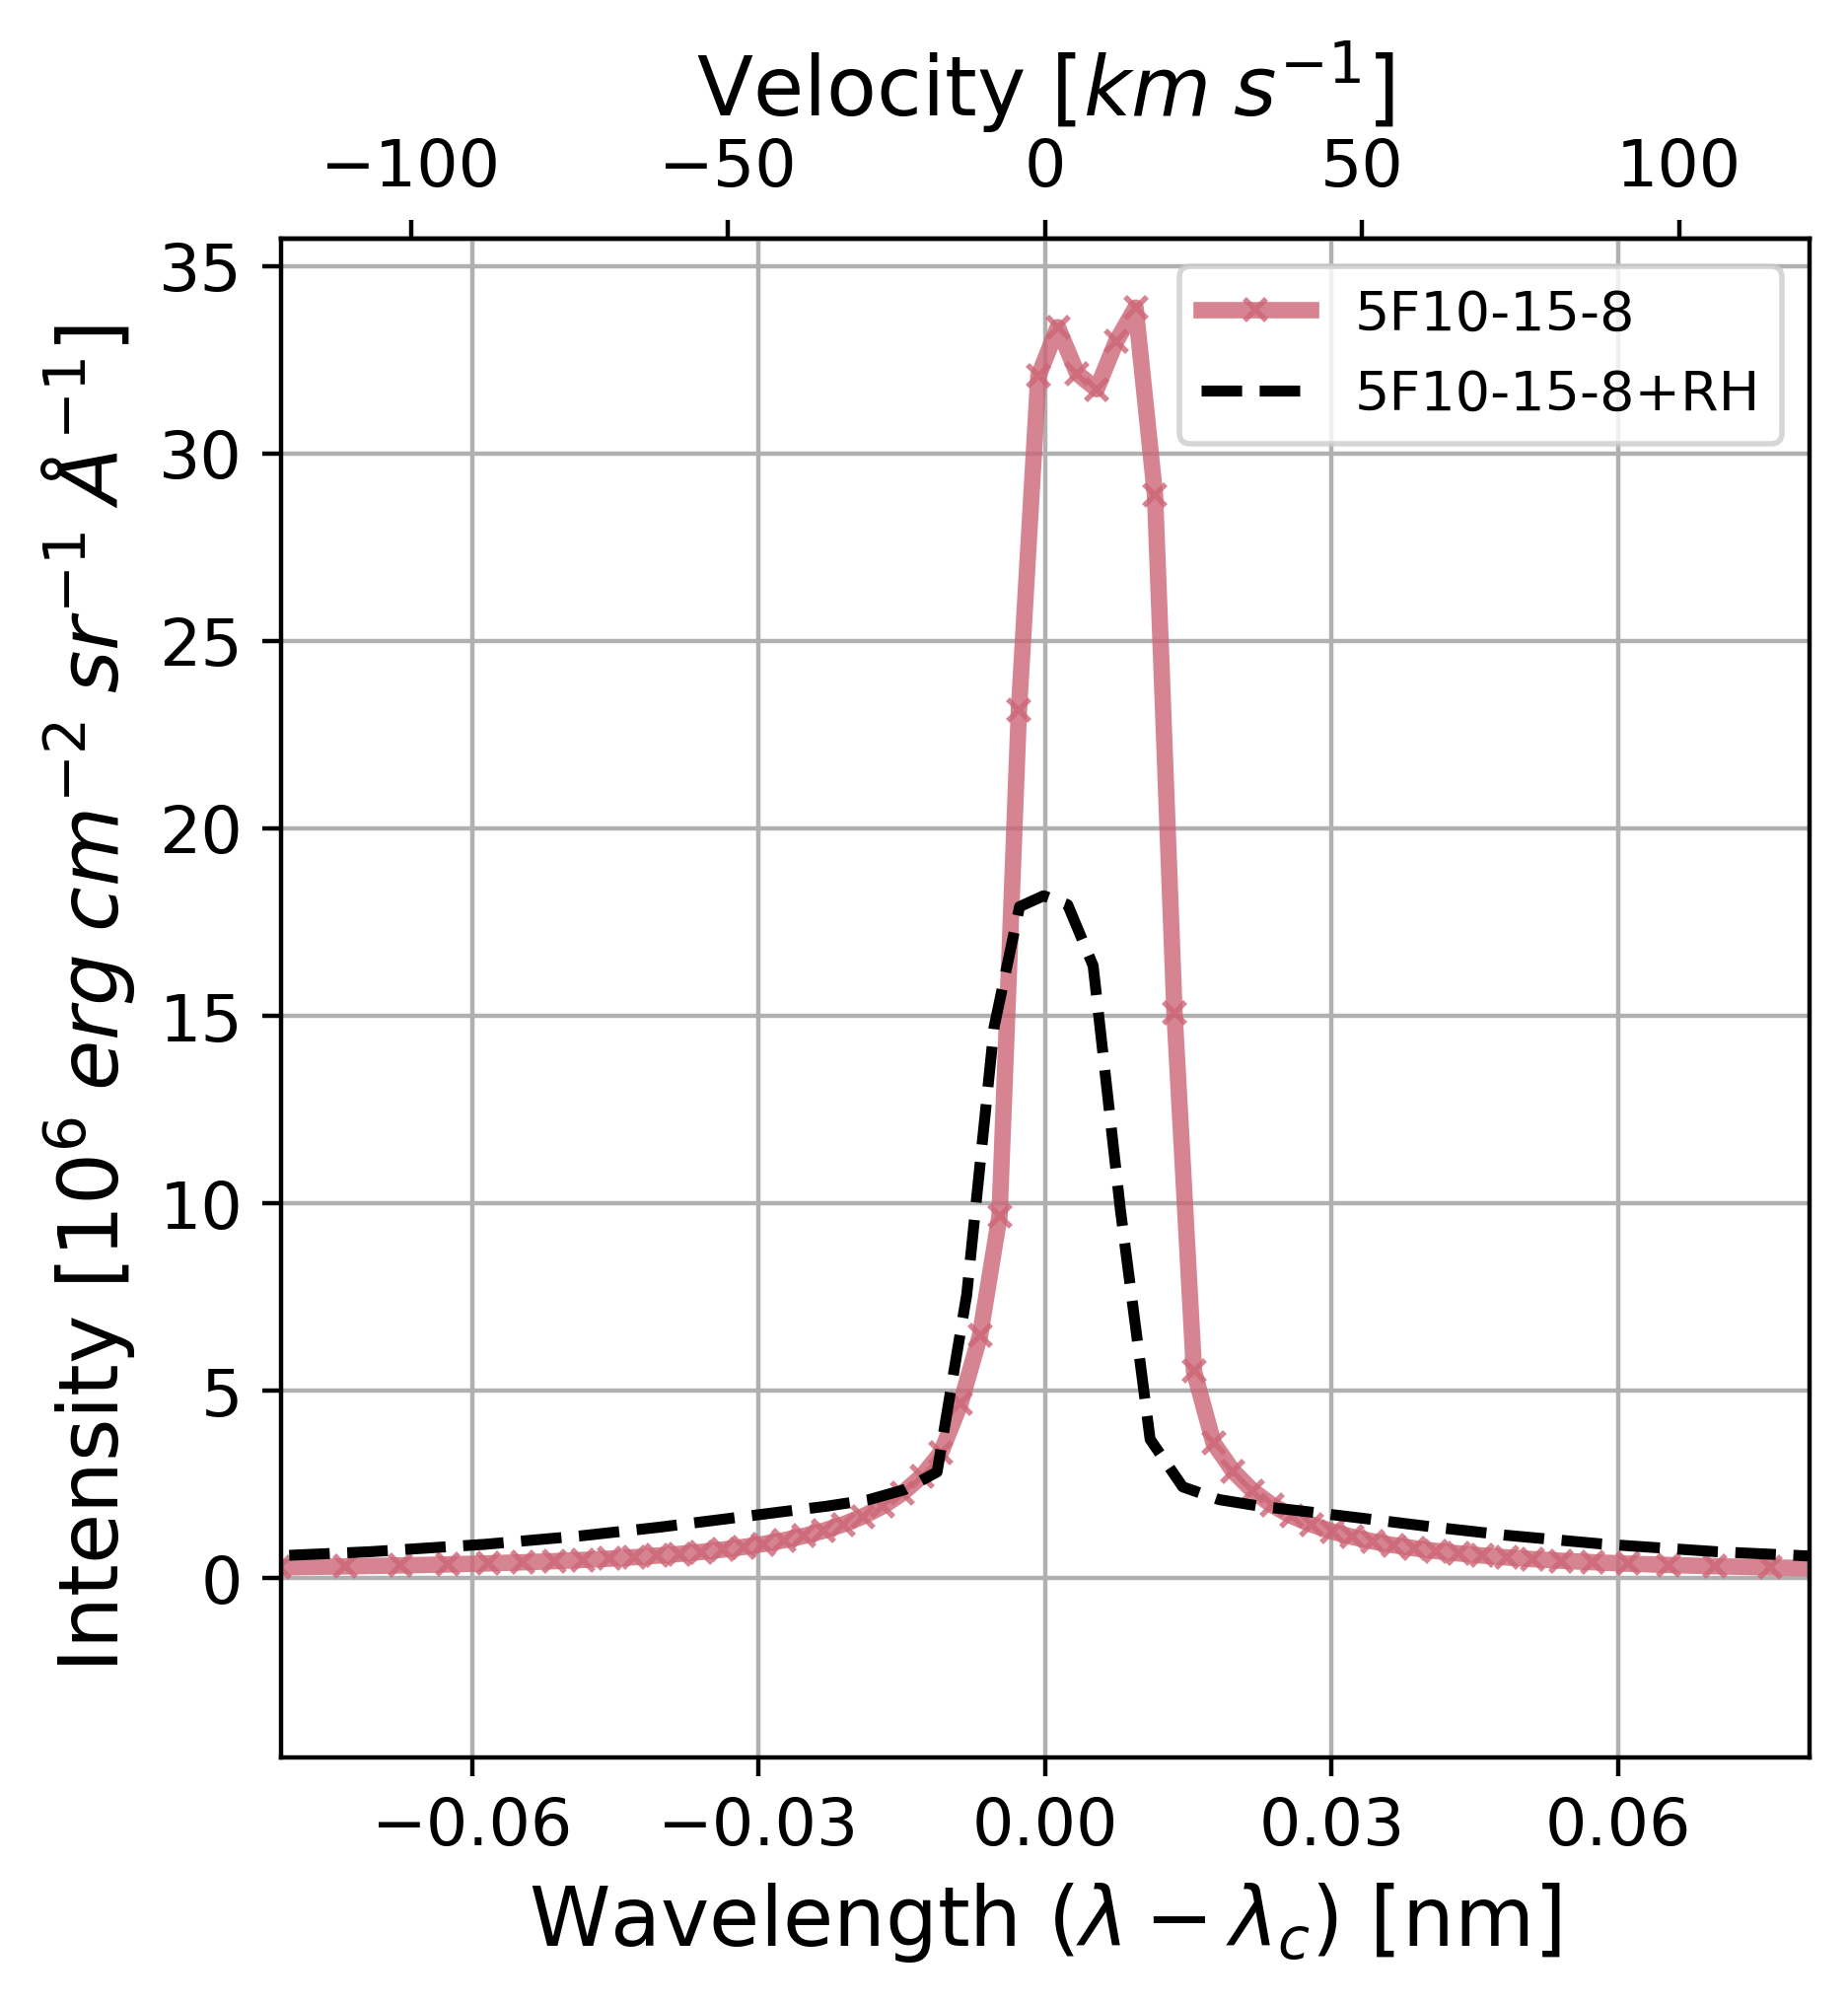

In [709]:
cmap_choice2 = ['#332288','#88CCEE','#44AA99','#117733','#999933','#CC6677','#AA4499','#AA4499','#AA4499','#AA4499']
#cmap_choice2 = plt.cm.jet(np.linspace(0,1,len(timesinit)))

line = 396.847
line2 = 396.847
#line = 854.21


fig,ax=plt.subplots(figsize=(5,5),dpi=400)
i=-1

#ax.plot((doppler_shift_to_wavelength(396.847,q[kr,:-1]*qnorm)),(psf_adjust(wavelengths/u.nm, (outintt[int(timesinit[i]),kr,muind,:-2]-outintt[0,kr,muind,:-2])*1.9e11,fwhm,wavelengths/u.nm,ntw,gaussian_psf)/1e6),color=cmap_choice2[i],label='t = '+str(round(timesinit[i]/10,2))+'s',linewidth=3)
#ax.plot((doppler_shift_to_wavelength(396.847,q[kr,:-1]*qnorm)),min_max_normalize(psf_adjust(wavelengths/u.nm, (outintt[int(timesinit[i]),kr,muind,:-2])*1.9e11,fwhm,wavelengths/u.nm,ntw,gaussian_psf)/1e6),color=cmap_choice2[i],label='t = '+str(round(timesinit[i]/10,2))+'s',linewidth=3)

arr = ((outintt_new[290,kr,muind,:-101]*1.9e11)-(outintt_new[0,kr,muind,:-101])*1.9e11)/1e6
x = (doppler_to_wavelength(line,(q_new[kr,:-100]*qnorm_new-1)))
f = interp1d(x, arr, kind='linear')
x_new = read_rhversion_CRD['wl_rh']-line
x_new2 = x_new[(x_new>-5) & (x_new<5)]
resampled_arr = f(x_new2)

ax.plot(x,arr,label='5F10-15-8',marker='x',linewidth=3,c=cmap_choice2[5],markersize=4,alpha=0.8)
#ax.plot((doppler_shift_to_wavelength(line,q_new[kr,:-100]*qnorm_new)),((outintt_new[480,kr,muind,:-101]*1.9e11)-(outintt_new[0,kr,muind,:-101])*1.9e11)/1e6,color=cmap_choice2[i],label='t = '+str(round(timesinit[i]/10,2))+'s, RADYN',linewidth=3)
#ax.plot((doppler_shift_to_wavelength(396.847,q_new[kr,:-1]*qnorm_new)),min_max_normalize(psf_adjust(wavelengths/u.nm, (outintt_new[int(timesinit[i]),kr,muind,:-2])*1.9e11,fwhm,wavelengths/u.nm,ntw,gaussian_psf)/1e6),color=cmap_choice2[i],label='t = '+str(round(timesinit[i]/10,2))+'s',linewidth=3)
#ax.plot((doppler_shift_to_wavelength(line,q_new[kr,:-100]*qnorm_new)),((outintt_new[0,kr,muind,:-101])*1.9e11)/1e6,color=cmap_choice2[i],label='t = '+str(round(timesinit[i]/10,2))+'s, RADYN',linewidth=3)


ax.set_xlim([.08,-.08])
xvals = np.zeros(30)
for i in range(len(xvals)):
    xvals[i] = -0.04
#labelLines(plt.gca().get_lines(),align=True,xvals=xvals,color='k',fontsize=15)

#for i in range(len(times2)):
#    ax.plot((doppler_shift_to_wavelength(854.2,q[kr,:-110]*qnorm)),psf_adjust(wavelengths/u.nm, outintt[int(times2[i]),kr,muind,:-111]*1.9e11,fwhm,wavelengths/u.nm,ntw,gaussian_psf)/1e6,color=cmap_choice2[len(timesinit)+i],label='t = '+str(round(times2[i]/10,2))+'s',linewidth=3)
plt.gca().invert_xaxis()
#ax.legend()
#ax.axvline(0,c='black')
ax.grid()
ax.set_ylabel(r'Intensity [$10^6\;erg\;cm^{-2}\;sr^{-1}\;\AA^{-1}$]',fontsize=15)
secaxx = ax.secondary_xaxis('top', functions=(veltrans,wltrans))
secaxx.set_xlabel(r'Velocity $[km\; s^{-1}]$',fontsize=15)
ax.set_xlabel(r'Wavelength ($\lambda - \lambda_c$) [nm]',fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=12)
secaxx.tick_params(axis='both', which='major', labelsize=12)
ax.set_xticks([-0.06,-0.03,0,0.03,0.06])

#ax.plot(read_rhversion['wl_rh']-line,(psf_adjust(wavelengths_rh,read_rhversion['int_rh'],fwhm,wavelengths_rh,ntw,gaussian_psf)/1e6))
ax.plot(read_rhversion_CRD['wl_rh']-line2,(read_rhversion_CRD['int_rh']/1e6)-(read_rhqs['int_rh'][5:879]/1e6),label='5F10-15-8+RH',linewidth=2,markersize=4,alpha=1,c='black',linestyle='--')
#ax.plot(read_rhversion_CRD['wl_rh']-line,(read_rhqs['int_rh'][5:879]/1e6),label='RADYN+RH')

shift = read_rhversion_CRD['wl_rh']-line
inds1 = np.where((shift>-0.2) & (shift<0.2))
inds2 = np.where((x_new2>-0.2) & (x_new2<0.2))

#percdiff = 100*((resampled_arr[inds2]-rhv[inds1])/rhv[inds1])

#ax2.plot(x_new2[inds2],percdiff,c='#CC6677',marker='s')
#ax2.set_ylim([-50,50])
#ax2.set_ylabel('% Difference')
#ax.plot(read_rhversion['wl_rh']-396.847,min_max_normalize(psf_adjust(wavelengths_rh,read_rhversion['int_rh'],fwhm/10,wavelengths_rh,ntw,gaussian_psf)/1e6))
#ax.set_ylim([0,0.6])
#ax.set_xlim([-.05,.05])
#ax.set_ylim([-10,28])
ax.legend()

NameError: name 'doppler_shift_to_wavelength' is not defined

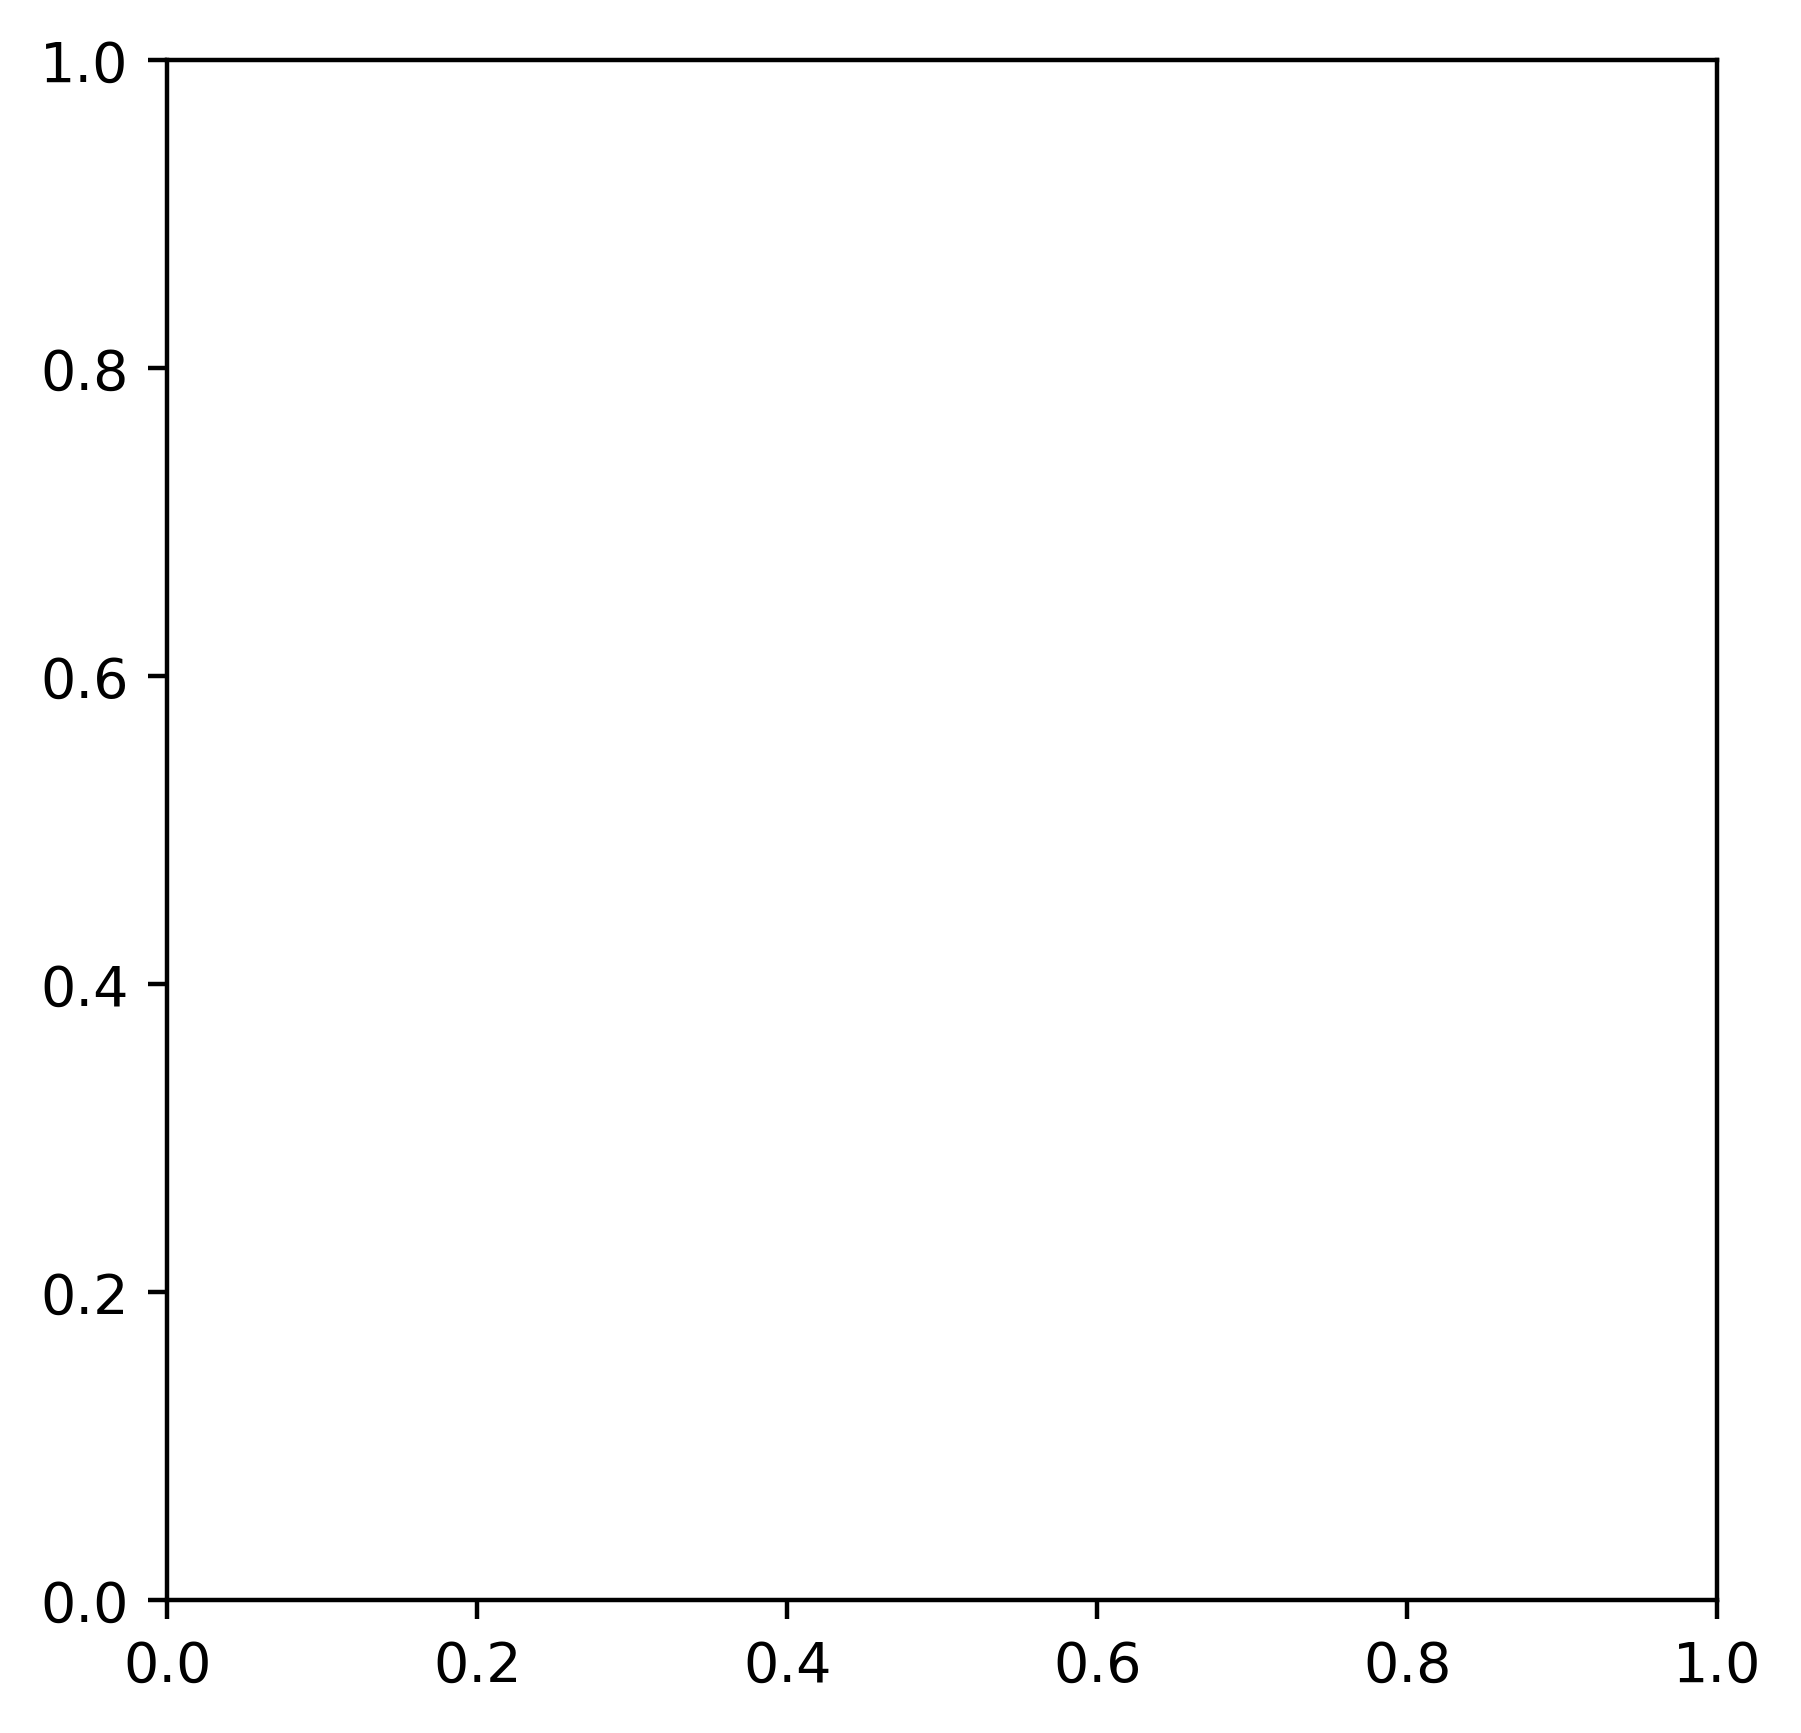

In [132]:
cmap_choice2 = ['#332288','#88CCEE','#44AA99','#117733','#999933','#CC6677','#AA4499','#AA4499','#AA4499','#AA4499']
#cmap_choice2 = plt.cm.jet(np.linspace(0,1,len(timesinit)))

line = 396.847
line2 = 396.847
#line = 854.21


fig,ax=plt.subplots(figsize=(5,5),dpi=400)
i=-1

#ax.plot((doppler_shift_to_wavelength(396.847,q[kr,:-1]*qnorm)),(psf_adjust(wavelengths/u.nm, (outintt[int(timesinit[i]),kr,muind,:-2]-outintt[0,kr,muind,:-2])*1.9e11,fwhm,wavelengths/u.nm,ntw,gaussian_psf)/1e6),color=cmap_choice2[i],label='t = '+str(round(timesinit[i]/10,2))+'s',linewidth=3)
#ax.plot((doppler_shift_to_wavelength(396.847,q[kr,:-1]*qnorm)),min_max_normalize(psf_adjust(wavelengths/u.nm, (outintt[int(timesinit[i]),kr,muind,:-2])*1.9e11,fwhm,wavelengths/u.nm,ntw,gaussian_psf)/1e6),color=cmap_choice2[i],label='t = '+str(round(timesinit[i]/10,2))+'s',linewidth=3)

arr = ((outintt_new[480,kr,muind,:-101]*1.9e11)-(outintt_new[0,kr,muind,:-101])*1.9e11)/1e6
x = (doppler_shift_to_wavelength(line,q_new[kr,:-100]*qnorm_new)-1)
f = interp1d(x, arr, kind='linear')
x_new = read_rhversion_CRD['wl_rh']-line
x_new2 = x_new[(x_new>-5) & (x_new<5)]
resampled_arr = f(x_new2)
ax.plot(x_new2,resampled_arr,label='RADYN',marker='x',linewidth=3,c=cmap_choice2[5],markersize=4)
#ax.plot((doppler_shift_to_wavelength(line,q_new[kr,:-100]*qnorm_new)),((outintt_new[480,kr,muind,:-101]*1.9e11)-(outintt_new[0,kr,muind,:-101])*1.9e11)/1e6,color=cmap_choice2[i],label='t = '+str(round(timesinit[i]/10,2))+'s, RADYN',linewidth=3)
#ax.plot((doppler_shift_to_wavelength(396.847,q_new[kr,:-1]*qnorm_new)),min_max_normalize(psf_adjust(wavelengths/u.nm, (outintt_new[int(timesinit[i]),kr,muind,:-2])*1.9e11,fwhm,wavelengths/u.nm,ntw,gaussian_psf)/1e6),color=cmap_choice2[i],label='t = '+str(round(timesinit[i]/10,2))+'s',linewidth=3)
#ax.plot((doppler_shift_to_wavelength(line,q_new[kr,:-100]*qnorm_new)),((outintt_new[0,kr,muind,:-101])*1.9e11)/1e6,color=cmap_choice2[i],label='t = '+str(round(timesinit[i]/10,2))+'s, RADYN',linewidth=3)


ax.set_xlim([.08,-.08])
xvals = np.zeros(30)
for i in range(len(xvals)):
    xvals[i] = -0.04
#labelLines(plt.gca().get_lines(),align=True,xvals=xvals,color='k',fontsize=15)

#for i in range(len(times2)):
#    ax.plot((doppler_shift_to_wavelength(854.2,q[kr,:-110]*qnorm)),psf_adjust(wavelengths/u.nm, outintt[int(times2[i]),kr,muind,:-111]*1.9e11,fwhm,wavelengths/u.nm,ntw,gaussian_psf)/1e6,color=cmap_choice2[len(timesinit)+i],label='t = '+str(round(times2[i]/10,2))+'s',linewidth=3)
plt.gca().invert_xaxis()
#ax.legend()
#ax.axvline(0,c='black')
ax.grid()
ax.set_ylabel(r'Intensity [$10^6\;erg\;cm^{-2}\;sr^{-1}\;\AA^{-1}$]')
secaxx = ax.secondary_xaxis('top', functions=(veltrans,wltrans))
secaxx.set_xlabel(r'Velocity $[km\; s^{-1}]$',fontsize=15)
ax.set_xlabel(r'Wavelength ($\lambda - \lambda_c$) [nm]',fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=12)
secaxx.tick_params(axis='both', which='major', labelsize=12)
ax.set_xticks([-0.06,-0.03,0,0.03,0.06])

#ax.plot(read_rhversion['wl_rh']-line,(psf_adjust(wavelengths_rh,read_rhversion['int_rh'],fwhm,wavelengths_rh,ntw,gaussian_psf)/1e6))
ax.plot(read_rhversion_CRD['wl_rh']-line2,(read_rhversion_CRD['int_rh']/1e6)-(read_rhqs['int_rh'][5:879]/1e6),label='RADYN+RH',marker='o',linewidth=2,markersize=4,alpha=1,c=cmap_choice2[1])
#ax.plot(read_rhversion_CRD['wl_rh']-line,(read_rhqs['int_rh'][5:879]/1e6),label='RADYN+RH')

shift = read_rhversion_CRD['wl_rh']-line
inds1 = np.where((shift>-0.2) & (shift<0.2))
inds2 = np.where((x_new2>-0.2) & (x_new2<0.2))

#percdiff = 100*((resampled_arr[inds2]-rhv[inds1])/rhv[inds1])
ax2 = ax.twinx()
#ax2.plot(x_new2[inds2],percdiff,c='#CC6677',marker='s')
#ax2.set_ylim([-50,50])
#ax2.set_ylabel('% Difference')
#ax.plot(read_rhversion['wl_rh']-396.847,min_max_normalize(psf_adjust(wavelengths_rh,read_rhversion['int_rh'],fwhm/10,wavelengths_rh,ntw,gaussian_psf)/1e6))
#ax.set_ylim([0,0.6])
#ax.set_xlim([-.05,.05])
#ax.set_ylim([-10,28])
ax.legend()


In [40]:
def tosi(self, wav, s):
    clight=2.99792458e8      #speed of light [m/s]                                  
    aa_to_m=1e-10                                                                        
    cm_to_m=1e-2                       
    s /= cm_to_m**2 * aa_to_m # from from Watt /(s cm2 ster AA) to Watt/(s m2 ster m) 
    s *= (wav*aa_to_m)**2 / clight # to Watt/(s m2 Hz ster)
    return s

In [42]:
# I think 1.9e11 is the conversion...

In [44]:
q = read['q']
nq = read['nq']
qnorm = read['qnorm']
outintt = read['outintt']
nmu = read['nmu']
#q[0:nq[kr]-1,kr]*qnorm,outintt[1:nq[kr],nmu-1,kr,*]

NameError: name 'read' is not defined

In [46]:
timesinit

[580]

In [48]:
import label

ModuleNotFoundError: No module named 'label'

In [50]:
len(outintt[int(timesinit[i]),kr,muind,:-101])

IndexError: index 580 is out of bounds for axis 0 with size 501

In [52]:


cmap_choice2 = ['#332288','#88CCEE','#44AA99','#117733','#999933','#CC6677','#AA4499','#AA4499','#AA4499','#AA4499']
#cmap_choice2 = plt.cm.jet(np.linspace(0,1,len(timesinit)))

wavelengths = (doppler_shift_to_wavelength(396.8,q[kr,:-1]*qnorm))

fig,ax=plt.subplots(figsize=(9,9),dpi=400)
for i in range(len(timesinit)):
    #if i==2:
    #    #ax.plot((doppler_shift_to_wavelength(396.8,q[kr,:-1]*qnorm)),(psf_adjust(wavelengths/u.nm, outintt[int(timesinit[i]),kr,muind,:-2]*1.9e11,fwhm,wavelengths/u.nm,ntw,gaussian_psf)/1e6)-(5*i),marker='o',color=cmap_choice2[i],label='t = '+str(round(timesinit[i]/10,2))+'s',linewidth=3)
    #    ax.plot((doppler_shift_to_wavelength(396.8,q[kr,:-1]*qnorm)),(psf_adjust(wavelengths/u.nm, outintt[int(timesinit[i]),kr,muind,:-2]*1.9e11-outintt[int(timesinit[0]),kr,muind,:-2]*1.9e11,fwhm,wavelengths/u.nm,ntw,gaussian_psf)/1e6)-(5*i),color=cmap_choice2[-i],label='t = '+str(round(timesinit[i]/10,2))+'s',linewidth=3)

    #else:
    ax.plot(((,q[kr,:-1]*qnorm),(psf_adjust(wavelengths/u.nm, outintt[int(timesinit[i]),kr,muind,:-2]*1.9e11-outintt[int(timesinit[0]),kr,muind,:-2]*1.9e11,fwhm,wavelengths/u.nm,ntw,gaussian_psf)/1e6)-(5*i),color=cmap_choice2[i],label='t = '+str(round(timesinit[i]/10,2))+'s',linewidth=3)
       
    ax.set_xlim([.09,-.09])
xvals = np.zeros(30)
for i in range(len(xvals)):
    xvals[i] = -0.04
labelLines(plt.gca().get_lines(),align=True,xvals=xvals,color='k',fontsize=15)

#for i in range(len(times2)):
#    ax.plot((doppler_shift_to_wavelength(854.2,q[kr,:-110]*qnorm)),psf_adjust(wavelengths/u.nm, outintt[int(times2[i]),kr,muind,:-111]*1.9e11,fwhm,wavelengths/u.nm,ntw,gaussian_psf)/1e6,color=cmap_choice2[len(timesinit)+i],label='t = '+str(round(times2[i]/10,2))+'s',linewidth=3)
plt.gca().invert_xaxis()
#ax.legend()
#ax.axvline(0,c='black')
ax.grid()
#ax.set_ylabel(r'Intensity [$10^6\;erg\;cm^{-2}\;sr^{-1}\;\AA^{-1}$]')
secaxx = ax.secondary_xaxis('top', functions=(veltrans,wltrans))
secaxx.set_xlabel(r'Velocity $[km\; s^{-1}]$',fontsize=15)
ax.set_xlabel(r'Wavelength ($\lambda - \lambda_c$) [nm]',fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=12)
secaxx.tick_params(axis='both', which='major', labelsize=12)
#ax.yaxis.
ax.yaxis.set_ticks([])

SyntaxError: invalid syntax (2073872054.py, line 13)

In [83]:
!pip install matplotlib-label-lines

In [248]:
lines = plt.gca().get_lines()
l1=lines[-1]
labelLine(l1,0.6,label=r'$Re=${}'.format(l1.get_label()),ha='left',va='bottom',align = False)
labelLines(lines[:-1],align=False)

SyntaxError: invalid syntax (1943292161.py, line 1)

In [85]:
from labellines import *